### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Analysis/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

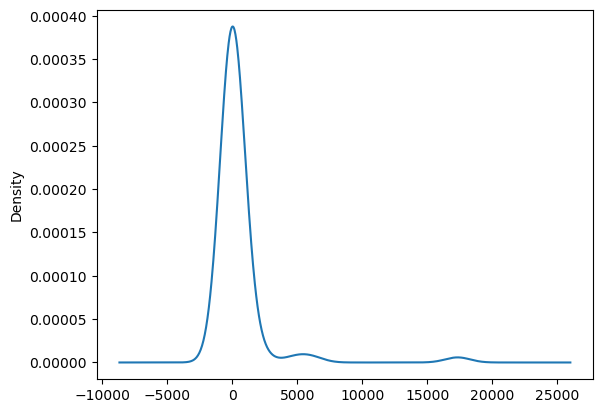

In [5]:
# Visualize the value counts of APPLICATION_TYPE
class_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(class_counts[class_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

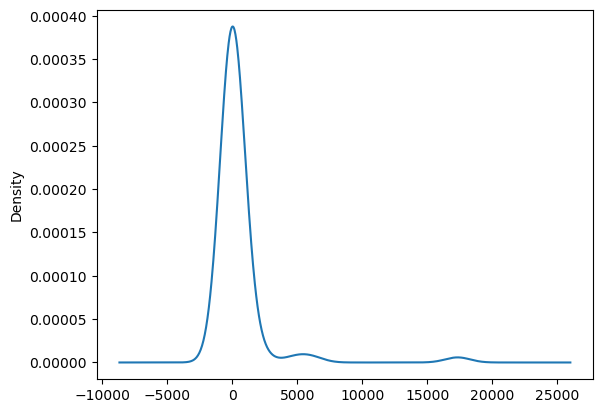

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts <100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()


In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/tyronefraley/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df

/Users/tyronefraley/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL", "IS_SUCCESSFUL"],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/tyronefraley/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and 3 hidden nodes for each layer.
number_inputfeatures = len(X_train[0])
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10
hidden_node_layer4 = 5



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                4640      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 7,441
Trainable params: 7,441
Non-trainable params: 0
_________________________________________________________________


2023-01-18 13:10:38.540567: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 13:10:38.541248: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
#Create a callback that saves the model's weights every 5 epochs.
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/50

Epoch 00001: saving model to checkpoints/weights.01.hdf5
   32/25724 [..............................] - ETA: 27s - loss: 0.4547 - accuracy: 0.8125
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  224/25724 [..............................] - ETA: 10s - loss: 0.5207 - accuracy: 0.7455
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  416/25724 [.....................


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3456/25724 [===>..........................] - ETA: 8s - loss: 0.5297 - accuracy: 0.7399
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3584/25724 [===>..........................] - ETA: 8s - loss: 0.5298 - accuracy: 0.7402
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3712/25724 [===>..........................] - ETA: 8s - loss: 0.5292 - accuracy: 0.7411
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoint


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6880/25724 [=======>......................] - ETA: 7s - loss: 0.5260 - accuracy: 0.7458
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7040/25724 [=======>......................] - ETA: 7s - loss: 0.5245 - accuracy: 0.7457
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7200/25724 [=======>......................] - ETA: 7s - loss: 0.5248 


Epoch 00001: saving model to checkpoints/weights.01.hdf5
10272/25724 [==========>...................] - ETA: 6s - loss: 0.5196 - accuracy: 0.7499
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
10432/25724 [===========>..................] - ETA: 5s - loss: 0.5200 - accuracy: 0.7495
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
10592/25724 [===========>..................] - ETA: 5s - loss: 0.5202 - accuracy: 0.7495
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoint

13600/25724 [==============>...............] - ETA: 4s - loss: 0.5236 - accuracy: 0.7482
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
13760/25724 [===============>..............] - ETA: 4s - loss: 0.5237 - accuracy: 0.7480
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
13888/25724 [===============>..............] - ETA: 4s - loss: 0.5235 - accuracy: 0.7481
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoint


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
17056/25724 [==================>...........] - ETA: 3s - loss: 0.5274 - accuracy: 0.7445
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
17216/25724 [===================>..........] - ETA: 3s - loss: 0.5274 - accuracy: 0.7442
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
17344/25724 [===================>..........] - ETA: 3s - loss: 0.5279 

20352/25724 [======================>.......] - ETA: 2s - loss: 0.5282 - accuracy: 0.7435
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
20512/25724 [======================>.......] - ETA: 2s - loss: 0.5280 - accuracy: 0.7437
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
20672/25724 [=======================>......] - ETA: 1s - loss: 0.5286 - accuracy: 0.7437
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoint


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.5285 - accuracy: 0.7435
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5286 - accuracy: 0.7433
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5289 - accuracy: 0.7431
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoint

 1280/25724 [>.............................] - ETA: 9s - loss: 0.5167 - accuracy: 0.7477 
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 1440/25724 [>.............................] - ETA: 9s - loss: 0.5209 - accuracy: 0.7444
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 1600/25724 [>.............................] - ETA: 9s - loss: 0.5262 - accuracy: 0.7431
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoin

 4640/25724 [====>.........................] - ETA: 8s - loss: 0.5359 - accuracy: 0.7341
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 4800/25724 [====>.........................] - ETA: 8s - loss: 0.5348 - accuracy: 0.7354
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 4928/25724 [====>.........................] - ETA: 8s - loss: 0.5345 - accuracy: 0.7354
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint

 8000/25724 [========>.....................] - ETA: 6s - loss: 0.5363 - accuracy: 0.7350
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 8160/25724 [========>.....................] - ETA: 6s - loss: 0.5353 - accuracy: 0.7358
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 8288/25724 [========>.....................] - ETA: 6s - loss: 0.5357 - accuracy: 0.7355
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint


Epoch 00002: saving model to checkpoints/weights.02.hdf5
11392/25724 [============>.................] - ETA: 5s - loss: 0.5338 - accuracy: 0.7388
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
11552/25724 [============>.................] - ETA: 5s - loss: 0.5330 - accuracy: 0.7398
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
11680/25724 [============>.................] - ETA: 5s - loss: 0.5330 - accuracy: 0.7396
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint

14688/25724 [================>.............] - ETA: 4s - loss: 0.5331 - accuracy: 0.7400
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
14816/25724 [================>.............] - ETA: 4s - loss: 0.5328 - accuracy: 0.7401
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
14944/25724 [================>.............] - ETA: 4s - loss: 0.5329 - accuracy: 0.7402
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
15072/25724 [================>..........

17952/25724 [===================>..........] - ETA: 3s - loss: 0.5308 - accuracy: 0.7414
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
18048/25724 [====================>.........] - ETA: 3s - loss: 0.5307 - accuracy: 0.7416
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
18176/25724 [====================>.........] - ETA: 3s - loss: 0.5309 - accuracy: 0.7413
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
18304/25724 [====================>.........] - ETA: 3s - loss: 0.5304 - accuracy: 0.7414
Epoch 000

21248/25724 [=======================>......] - ETA: 1s - loss: 0.5273 - accuracy: 0.7437
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
21408/25724 [=======================>......] - ETA: 1s - loss: 0.5270 - accuracy: 0.7439
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
21536/25724 [========================>.....] - ETA: 1s - loss: 0.5272 - accuracy: 0.7439
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.5280 - accuracy: 0.7435
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.5278 - accuracy: 0.7437
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 0.5278 - accuracy: 0.7437
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint

 2176/25724 [=>............................] - ETA: 9s - loss: 0.5306 - accuracy: 0.7335
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 2336/25724 [=>............................] - ETA: 9s - loss: 0.5302 - accuracy: 0.7346
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 2464/25724 [=>............................] - ETA: 9s - loss: 0.5305 - accuracy: 0.7342
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoint

 5600/25724 [=====>........................] - ETA: 7s - loss: 0.5238 - accuracy: 0.7446
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5728/25724 [=====>........................] - ETA: 7s - loss: 0.5239 - accuracy: 0.7449
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5856/25724 [=====>........................] - ETA: 7s - loss: 0.5235 - accuracy: 0.7457
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5984/25724 [=====>.....................


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9024/25724 [=========>....................] - ETA: 6s - loss: 0.5266 - accuracy: 0.7437
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9152/25724 [=========>....................] - ETA: 6s - loss: 0.5261 - accuracy: 0.7442
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9280/25724 [=========>....................] - ETA: 6s - loss: 0.5259 - accuracy: 0.7444
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoint


Epoch 00003: saving model to checkpoints/weights.03.hdf5
12352/25724 [=============>................] - ETA: 5s - loss: 0.5270 - accuracy: 0.7435
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12512/25724 [=============>................] - ETA: 5s - loss: 0.5257 - accuracy: 0.7446
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12608/25724 [=============>................] - ETA: 5s - loss: 0.5258 - accuracy: 0.7442
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoint


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15744/25724 [=================>............] - ETA: 3s - loss: 0.5263 - accuracy: 0.7445
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15904/25724 [=================>............] - ETA: 3s - loss: 0.5262 - accuracy: 0.7445
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
16032/25724 [=================>............] - ETA: 3s - loss: 0.5262 - accuracy: 0.7443
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoint

19040/25724 [=====================>........] - ETA: 2s - loss: 0.5259 - accuracy: 0.7444
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
19168/25724 [=====================>........] - ETA: 2s - loss: 0.5260 - accuracy: 0.7443
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
19296/25724 [=====================>........] - ETA: 2s - loss: 0.5260 - accuracy: 0.7444
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
19424/25724 [=====================>.....


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.5259 - accuracy: 0.7441
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22592/25724 [=========================>....] - ETA: 1s - loss: 0.5260 - accuracy: 0.7441
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22720/25724 [=========================>....] - ETA: 1s - loss: 0.5261 - accuracy: 0.7439
Epoch 00003: saving model to checkpoint


Epoch 00003: saving model to checkpoints/weights.03.hdf5
25724/25724 [==============================] - 10s 406us/sample - loss: 0.5281 - accuracy: 0.7432
Epoch 4/50

Epoch 00004: saving model to checkpoints/weights.04.hdf5
   32/25724 [..............................] - ETA: 14s - loss: 0.6104 - accuracy: 0.7500
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
  160/25724 [..............................] - ETA: 10s - loss: 0.5374 - accuracy: 0.7375
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
  320/25724 [..............................] - ETA: 10s - loss: 0.5482 - ac


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 3392/25724 [==>...........................] - ETA: 8s - loss: 0.5361 - accuracy: 0.7391
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 3488/25724 [===>..........................] - ETA: 8s - loss: 0.5385 - accuracy: 0.7354
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 3616/25724 [===>..........................] - ETA: 8s - loss: 0.5369 - accuracy: 0.7373
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoint

 6688/25724 [======>.......................] - ETA: 7s - loss: 0.5347 - accuracy: 0.7391
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 6848/25724 [======>.......................] - ETA: 7s - loss: 0.5338 - accuracy: 0.7393
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 7008/25724 [=======>......................] - ETA: 7s - loss: 0.5327 - accuracy: 0.7402
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoint


Epoch 00004: saving model to checkpoints/weights.04.hdf5
10144/25724 [==========>...................] - ETA: 6s - loss: 0.5312 - accuracy: 0.7395
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
10304/25724 [===========>..................] - ETA: 6s - loss: 0.5323 - accuracy: 0.7387
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
10432/25724 [===========>..................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7385
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoint

13440/25724 [==============>...............] - ETA: 4s - loss: 0.5300 - accuracy: 0.7408
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
13600/25724 [==============>...............] - ETA: 4s - loss: 0.5297 - accuracy: 0.7412
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
13728/25724 [===============>..............] - ETA: 4s - loss: 0.5297 - accuracy: 0.7413
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoint


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
16864/25724 [==================>...........] - ETA: 3s - loss: 0.5287 - accuracy: 0.7428
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
16992/25724 [==================>...........] - ETA: 3s - loss: 0.5287 - accuracy: 0.7428
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
17120/25724 [==================>...........] - ETA: 3s - loss: 0.5286 - accuracy: 0.7429
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoint


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
20192/25724 [======================>.......] - ETA: 2s - loss: 0.5285 - accuracy: 0.7429
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
20320/25724 [======================>.......] - ETA: 2s - loss: 0.5287 - accuracy: 0.7426
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
20448/25724 [======================>.......] - ETA: 2s - loss: 0.5285 - accuracy: 0.7428
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoint


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.5274 - accuracy: 0.7438
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.5276 - accuracy: 0.7435
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.5278 - accuracy: 0.7435
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoint


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 1184/25724 [>.............................] - ETA: 9s - loss: 0.5259 - accuracy: 0.7356
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 1312/25724 [>.............................] - ETA: 9s - loss: 0.5198 - accuracy: 0.7416
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 1440/25724 [>.............................] - ETA: 9s - loss: 0.5241 - accuracy: 0.7368
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 4512/25724 [====>.........................] - ETA: 8s - loss: 0.5317 - accuracy: 0.7380
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 4640/25724 [====>.........................] - ETA: 8s - loss: 0.5331 - accuracy: 0.7371
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 4768/25724 [====>.........................] - ETA: 8s - loss: 0.5338 - accuracy: 0.7357
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 7840/25724 [========>.....................] - ETA: 7s - loss: 0.5325 - accuracy: 0.7383
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 7936/25724 [========>.....................] - ETA: 7s - loss: 0.5320 - accuracy: 0.7388
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 8064/25724 [========>.....................] - ETA: 7s - loss: 0.5314 - accuracy: 0.7396
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint

11104/25724 [===========>..................] - ETA: 5s - loss: 0.5308 - accuracy: 0.7404
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
11232/25724 [============>.................] - ETA: 5s - loss: 0.5316 - accuracy: 0.7398
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
11392/25724 [============>.................] - ETA: 5s - loss: 0.5313 - accuracy: 0.7397
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
14528/25724 [===============>..............] - ETA: 4s - loss: 0.5292 - accuracy: 0.7424
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
14656/25724 [================>.............] - ETA: 4s - loss: 0.5292 - accuracy: 0.7428
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
14784/25724 [================>.............] - ETA: 4s - loss: 0.5287 - accuracy: 0.7430
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint

17728/25724 [===================>..........] - ETA: 3s - loss: 0.5304 - accuracy: 0.7420
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
17888/25724 [===================>..........] - ETA: 3s - loss: 0.5301 - accuracy: 0.7421
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
18048/25724 [====================>.........] - ETA: 3s - loss: 0.5300 - accuracy: 0.7421
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint

21056/25724 [=======================>......] - ETA: 1s - loss: 0.5305 - accuracy: 0.7414
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
21184/25724 [=======================>......] - ETA: 1s - loss: 0.5302 - accuracy: 0.7414
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
21312/25724 [=======================>......] - ETA: 1s - loss: 0.5303 - accuracy: 0.7413
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
21440/25724 [========================>..


Epoch 00005: saving model to checkpoints/weights.05.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5293 - accuracy: 0.7425
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5295 - accuracy: 0.7423
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.5294 - accuracy: 0.7424
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
24800/25724 [===========================


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 2048/25724 [=>............................] - ETA: 9s - loss: 0.5119 - accuracy: 0.7578
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 2208/25724 [=>............................] - ETA: 9s - loss: 0.5112 - accuracy: 0.7586
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 2336/25724 [=>............................] - ETA: 9s - loss: 0.5098 - accuracy: 0.7586
Epoch 00006: saving model to checkpoint

 5312/25724 [=====>........................] - ETA: 8s - loss: 0.5192 - accuracy: 0.7511
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 5472/25724 [=====>........................] - ETA: 8s - loss: 0.5193 - accuracy: 0.7513
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 5632/25724 [=====>........................] - ETA: 8s - loss: 0.5215 - accuracy: 0.7493
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint

 8640/25724 [=========>....................] - ETA: 6s - loss: 0.5224 - accuracy: 0.7458
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 8800/25724 [=========>....................] - ETA: 6s - loss: 0.5229 - accuracy: 0.7457
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 8960/25724 [=========>....................] - ETA: 6s - loss: 0.5226 - accuracy: 0.7463
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint

12000/25724 [============>.................] - ETA: 5s - loss: 0.5229 - accuracy: 0.7450
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
12160/25724 [=============>................] - ETA: 5s - loss: 0.5222 - accuracy: 0.7456
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
12288/25724 [=============>................] - ETA: 5s - loss: 0.5223 - accuracy: 0.7454
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint

15456/25724 [=================>............] - ETA: 4s - loss: 0.5261 - accuracy: 0.7424
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
15584/25724 [=================>............] - ETA: 4s - loss: 0.5260 - accuracy: 0.7426
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
15712/25724 [=================>............] - ETA: 3s - loss: 0.5263 - accuracy: 0.7424
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint

18784/25724 [====================>.........] - ETA: 2s - loss: 0.5272 - accuracy: 0.7435
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
18944/25724 [=====================>........] - ETA: 2s - loss: 0.5266 - accuracy: 0.7439
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
19104/25724 [=====================>........] - ETA: 2s - loss: 0.5268 - accuracy: 0.7437
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.5289 - accuracy: 0.7420
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.5287 - accuracy: 0.7421
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.5287 - accuracy: 0.7420
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.5284 - accuracy: 0.7427
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 0.5284 - accuracy: 0.7427
Epoch 00006: saving model to checkpoints/weights.06.hdf5
25724/25724 [==============================] - 10s 403us/sample - loss: 0.5282 - accuracy: 0.7428
Epoch 7/50

Epoch 00007: saving model to checkpoints/weights.07.hdf5
   32/25724 [..............................] - ETA: 9s - loss: 0.4752 - accuracy: 0.7812
Epoch 00007: saving model to checkpoints/weight


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 3072/25724 [==>...........................] - ETA: 9s - loss: 0.5336 - accuracy: 0.7458
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 3200/25724 [==>...........................] - ETA: 9s - loss: 0.5336 - accuracy: 0.7453
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 3328/25724 [==>...........................] - ETA: 9s - loss: 0.5349 - accuracy: 0.7443
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint

 6368/25724 [======>.......................] - ETA: 8s - loss: 0.5269 - accuracy: 0.7445
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 6528/25724 [======>.......................] - ETA: 7s - loss: 0.5261 - accuracy: 0.7457
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 6688/25724 [======>.......................] - ETA: 7s - loss: 0.5251 - accuracy: 0.7470
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9792/25724 [==========>...................] - ETA: 6s - loss: 0.5235 - accuracy: 0.7465
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9952/25724 [==========>...................] - ETA: 6s - loss: 0.5236 - accuracy: 0.7458
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
10112/25724 [==========>...................] - ETA: 6s - loss: 0.5240 - accuracy: 0.7454
Epoch 00007: saving model to checkpoint


Epoch 00007: saving model to checkpoints/weights.07.hdf5
13120/25724 [==============>...............] - ETA: 5s - loss: 0.5265 - accuracy: 0.7431
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
13280/25724 [==============>...............] - ETA: 5s - loss: 0.5267 - accuracy: 0.7431
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
13408/25724 [==============>...............] - ETA: 4s - loss: 0.5265 - accuracy: 0.7431
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint

16448/25724 [==================>...........] - ETA: 3s - loss: 0.5259 - accuracy: 0.7437
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
16576/25724 [==================>...........] - ETA: 3s - loss: 0.5259 - accuracy: 0.7438
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
16736/25724 [==================>...........] - ETA: 3s - loss: 0.5255 - accuracy: 0.7440
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint

19776/25724 [======================>.......] - ETA: 2s - loss: 0.5262 - accuracy: 0.7442
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
19936/25724 [======================>.......] - ETA: 2s - loss: 0.5264 - accuracy: 0.7442
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
20064/25724 [======================>.......] - ETA: 2s - loss: 0.5263 - accuracy: 0.7444
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint


Epoch 00007: saving model to checkpoints/weights.07.hdf5
23136/25724 [=========================>....] - ETA: 1s - loss: 0.5264 - accuracy: 0.7448
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
23264/25724 [==========================>...] - ETA: 1s - loss: 0.5261 - accuracy: 0.7451
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.5261 - accuracy: 0.7451
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint

  672/25724 [..............................] - ETA: 9s - loss: 0.5219 - accuracy: 0.7485
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
  832/25724 [..............................] - ETA: 9s - loss: 0.5322 - accuracy: 0.7344
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
  992/25724 [>.............................] - ETA: 9s - loss: 0.5310 - accuracy: 0.7429
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoint


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 4192/25724 [===>..........................] - ETA: 8s - loss: 0.5163 - accuracy: 0.7579
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 4352/25724 [====>.........................] - ETA: 7s - loss: 0.5178 - accuracy: 0.7567
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 4512/25724 [====>.........................] - ETA: 7s - loss: 0.5201 - accuracy: 0.7542
Epoch 00008: saving model to checkpoint


Epoch 00008: saving model to checkpoints/weights.08.hdf5
 7648/25724 [=======>......................] - ETA: 6s - loss: 0.5210 - accuracy: 0.7512
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 7776/25724 [========>.....................] - ETA: 6s - loss: 0.5220 - accuracy: 0.7500
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 7936/25724 [========>.....................] - ETA: 6s - loss: 0.5226 - accuracy: 0.7491
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoint


Epoch 00008: saving model to checkpoints/weights.08.hdf5
10912/25724 [===========>..................] - ETA: 5s - loss: 0.5248 - accuracy: 0.7464
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
11040/25724 [===========>..................] - ETA: 5s - loss: 0.5254 - accuracy: 0.7459
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
11168/25724 [============>.................] - ETA: 5s - loss: 0.5255 - accuracy: 0.7456
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoint

14176/25724 [===============>..............] - ETA: 4s - loss: 0.5239 - accuracy: 0.7475
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14272/25724 [===============>..............] - ETA: 4s - loss: 0.5241 - accuracy: 0.7473
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14400/25724 [===============>..............] - ETA: 4s - loss: 0.5241 - accuracy: 0.7476
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14528/25724 [===============>..............] - ETA: 4s - loss: 0.5242 - accuracy: 0.7476
Epoch 000


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
17536/25724 [===================>..........] - ETA: 3s - loss: 0.5265 - accuracy: 0.7454
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
17664/25724 [===================>..........] - ETA: 3s - loss: 0.5266 - accuracy: 0.7454
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
17792/25724 [===================>..........] - ETA: 3s - loss: 0.5265 - accuracy: 0.7453
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoint


Epoch 00008: saving model to checkpoints/weights.08.hdf5
20800/25724 [=======================>......] - ETA: 2s - loss: 0.5265 - accuracy: 0.7454
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.5266 - accuracy: 0.7454
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.5264 - accuracy: 0.7456
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoint

24032/25724 [===========================>..] - ETA: 0s - loss: 0.5270 - accuracy: 0.7447
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5272 - accuracy: 0.7445
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5273 - accuracy: 0.7444
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
24416/25724 [===========================

 1504/25724 [>.............................] - ETA: 9s - loss: 0.5124 - accuracy: 0.7600
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 1632/25724 [>.............................] - ETA: 9s - loss: 0.5184 - accuracy: 0.7531
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 1760/25724 [=>............................] - ETA: 9s - loss: 0.5204 - accuracy: 0.7506
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 1888/25724 [=>.........................


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 4832/25724 [====>.........................] - ETA: 8s - loss: 0.5234 - accuracy: 0.7510
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 4960/25724 [====>.........................] - ETA: 8s - loss: 0.5249 - accuracy: 0.7502
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 5088/25724 [====>.........................] - ETA: 8s - loss: 0.5250 - accuracy: 0.7498
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoint

 8160/25724 [========>.....................] - ETA: 7s - loss: 0.5248 - accuracy: 0.7466
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 8288/25724 [========>.....................] - ETA: 7s - loss: 0.5245 - accuracy: 0.7466
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 8416/25724 [========>.....................] - ETA: 7s - loss: 0.5242 - accuracy: 0.7466
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 8544/25724 [========>..................


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
11488/25724 [============>.................] - ETA: 5s - loss: 0.5262 - accuracy: 0.7443
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
11616/25724 [============>.................] - ETA: 5s - loss: 0.5259 - accuracy: 0.7445
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
11744/25724 [============>.................] - ETA: 5s - loss: 0.5257 - accuracy: 0.7450
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoint

14688/25724 [================>.............] - ETA: 4s - loss: 0.5285 - accuracy: 0.7430
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
14816/25724 [================>.............] - ETA: 4s - loss: 0.5286 - accuracy: 0.7428
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
14944/25724 [================>.............] - ETA: 4s - loss: 0.5284 - accuracy: 0.7428
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
15072/25724 [================>..........


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
18048/25724 [====================>.........] - ETA: 3s - loss: 0.5274 - accuracy: 0.7439
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
18176/25724 [====================>.........] - ETA: 3s - loss: 0.5271 - accuracy: 0.7440
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
18304/25724 [====================>.........] - ETA: 3s - loss: 0.5274 - accuracy: 0.7439
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoint

21280/25724 [=======================>......] - ETA: 1s - loss: 0.5290 - accuracy: 0.7426
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
21408/25724 [=======================>......] - ETA: 1s - loss: 0.5289 - accuracy: 0.7428
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
21536/25724 [========================>.....] - ETA: 1s - loss: 0.5289 - accuracy: 0.7428
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
21664/25724 [========================>..

24544/25724 [===========================>..] - ETA: 0s - loss: 0.5290 - accuracy: 0.7422
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5288 - accuracy: 0.7424
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5289 - accuracy: 0.7424
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoint

 2080/25724 [=>............................] - ETA: 9s - loss: 0.5416 - accuracy: 0.7269
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2240/25724 [=>............................] - ETA: 9s - loss: 0.5423 - accuracy: 0.7281
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2368/25724 [=>............................] - ETA: 9s - loss: 0.5434 - accuracy: 0.7276
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoint

 5408/25724 [=====>........................] - ETA: 8s - loss: 0.5423 - accuracy: 0.7358
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5536/25724 [=====>........................] - ETA: 8s - loss: 0.5423 - accuracy: 0.7352
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5664/25724 [=====>........................] - ETA: 8s - loss: 0.5405 - accuracy: 0.7364
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoint

 8672/25724 [=========>....................] - ETA: 7s - loss: 0.5383 - accuracy: 0.7362
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 8800/25724 [=========>....................] - ETA: 7s - loss: 0.5387 - accuracy: 0.7357
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 8928/25724 [=========>....................] - ETA: 7s - loss: 0.5391 - accuracy: 0.7353
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9056/25724 [=========>.................


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12000/25724 [============>.................] - ETA: 5s - loss: 0.5359 - accuracy: 0.7379
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12160/25724 [=============>................] - ETA: 5s - loss: 0.5356 - accuracy: 0.7381
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12288/25724 [=============>................] - ETA: 5s - loss: 0.5351 - accuracy: 0.7384
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoint

15264/25724 [================>.............] - ETA: 4s - loss: 0.5328 - accuracy: 0.7406
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
15392/25724 [================>.............] - ETA: 4s - loss: 0.5331 - accuracy: 0.7405
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
15520/25724 [=================>............] - ETA: 4s - loss: 0.5335 - accuracy: 0.7399
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
15648/25724 [=================>.........

18560/25724 [====================>.........] - ETA: 3s - loss: 0.5312 - accuracy: 0.7420
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
18688/25724 [====================>.........] - ETA: 2s - loss: 0.5312 - accuracy: 0.7422
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
18848/25724 [====================>.........] - ETA: 2s - loss: 0.5306 - accuracy: 0.7427
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoint

21856/25724 [========================>.....] - ETA: 1s - loss: 0.5267 - accuracy: 0.7452
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
22016/25724 [========================>.....] - ETA: 1s - loss: 0.5266 - accuracy: 0.7453
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
22144/25724 [========================>.....] - ETA: 1s - loss: 0.5266 - accuracy: 0.7451
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoint


Epoch 00010: saving model to checkpoints/weights.10.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.5282 - accuracy: 0.7434
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 0.5279 - accuracy: 0.7438
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.5278 - accuracy: 0.7440
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoint

 2688/25724 [==>...........................] - ETA: 10s - loss: 0.5245 - accuracy: 0.7381
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2816/25724 [==>...........................] - ETA: 9s - loss: 0.5263 - accuracy: 0.7376 
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2912/25724 [==>...........................] - ETA: 10s - loss: 0.5264 - accuracy: 0.7373
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 3040/25724 [==>...........................] - ETA: 9s - loss: 0.5303 - accuracy: 0.7352 
Epoch


Epoch 00011: saving model to checkpoints/weights.11.hdf5
 5984/25724 [=====>........................] - ETA: 8s - loss: 0.5248 - accuracy: 0.7403
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 6048/25724 [======>.......................] - ETA: 8s - loss: 0.5244 - accuracy: 0.7404
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 6176/25724 [======>.......................] - ETA: 8s - loss: 0.5243 - accuracy: 0.7408
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 6304/25724 [======>.......................] - ETA: 8s - loss: 0.5244 - accuracy: 0.7408
Epoch 000


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9280/25724 [=========>....................] - ETA: 7s - loss: 0.5246 - accuracy: 0.7442
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9408/25724 [=========>....................] - ETA: 7s - loss: 0.5247 - accuracy: 0.7442
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9536/25724 [==========>...................] - ETA: 7s - loss: 0.5249 - accuracy: 0.7439
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoint

12544/25724 [=============>................] - ETA: 5s - loss: 0.5264 - accuracy: 0.7431
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12672/25724 [=============>................] - ETA: 5s - loss: 0.5263 - accuracy: 0.7431
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12800/25724 [=============>................] - ETA: 5s - loss: 0.5263 - accuracy: 0.7433
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoint


Epoch 00011: saving model to checkpoints/weights.11.hdf5
15840/25724 [=================>............] - ETA: 4s - loss: 0.5265 - accuracy: 0.7429
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
15968/25724 [=================>............] - ETA: 4s - loss: 0.5264 - accuracy: 0.7427
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
16096/25724 [=================>............] - ETA: 4s - loss: 0.5265 - accuracy: 0.7426
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoint

19168/25724 [=====================>........] - ETA: 2s - loss: 0.5296 - accuracy: 0.7402
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
19296/25724 [=====================>........] - ETA: 2s - loss: 0.5296 - accuracy: 0.7400
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
19424/25724 [=====================>........] - ETA: 2s - loss: 0.5303 - accuracy: 0.7398
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoint

22464/25724 [=========================>....] - ETA: 1s - loss: 0.5300 - accuracy: 0.7406
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22592/25724 [=========================>....] - ETA: 1s - loss: 0.5302 - accuracy: 0.7404
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22720/25724 [=========================>....] - ETA: 1s - loss: 0.5301 - accuracy: 0.7405
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22848/25724 [=========================>.

Epoch 12/50

Epoch 00012: saving model to checkpoints/weights.12.hdf5
   32/25724 [..............................] - ETA: 10s - loss: 0.3557 - accuracy: 0.9062
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
  192/25724 [..............................] - ETA: 9s - loss: 0.4591 - accuracy: 0.8021 
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
  320/25724 [..............................] - ETA: 9s - loss: 0.5055 - accuracy: 0.7656
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3360/25724 [==>...........................] - ETA: 9s - loss: 0.5296 - accuracy: 0.7432
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3488/25724 [===>..........................] - ETA: 9s - loss: 0.5321 - accuracy: 0.7414
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3616/25724 [===>..........................] - ETA: 9s - loss: 0.5307 - accuracy: 0.7431
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoint

 6592/25724 [======>.......................] - ETA: 8s - loss: 0.5263 - accuracy: 0.7450
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 6752/25724 [======>.......................] - ETA: 8s - loss: 0.5260 - accuracy: 0.7457
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 6880/25724 [=======>......................] - ETA: 8s - loss: 0.5262 - accuracy: 0.7456
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 6944/25724 [=======>......................] - ETA: 8s - loss: 0.5265 - accuracy: 0.7451
Epoch 000


Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9920/25724 [==========>...................] - ETA: 6s - loss: 0.5284 - accuracy: 0.7440
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
10048/25724 [==========>...................] - ETA: 6s - loss: 0.5275 - accuracy: 0.7449
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
10176/25724 [==========>...................] - ETA: 6s - loss: 0.5269 - accuracy: 0.7455
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoint

13152/25724 [==============>...............] - ETA: 5s - loss: 0.5274 - accuracy: 0.7439
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
13280/25724 [==============>...............] - ETA: 5s - loss: 0.5270 - accuracy: 0.7443
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
13408/25724 [==============>...............] - ETA: 5s - loss: 0.5278 - accuracy: 0.7437
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
13536/25724 [==============>............


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
16512/25724 [==================>...........] - ETA: 3s - loss: 0.5264 - accuracy: 0.7447
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
16640/25724 [==================>...........] - ETA: 3s - loss: 0.5264 - accuracy: 0.7447
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
16768/25724 [==================>...........] - ETA: 3s - loss: 0.5267 - accuracy: 0.7448
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoint

19744/25724 [======================>.......] - ETA: 2s - loss: 0.5284 - accuracy: 0.7437
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
19872/25724 [======================>.......] - ETA: 2s - loss: 0.5278 - accuracy: 0.7440
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
20000/25724 [======================>.......] - ETA: 2s - loss: 0.5276 - accuracy: 0.7443
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
20128/25724 [======================>....

23072/25724 [=========================>....] - ETA: 1s - loss: 0.5279 - accuracy: 0.7434
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
23200/25724 [==========================>...] - ETA: 1s - loss: 0.5276 - accuracy: 0.7437
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
23328/25724 [==========================>...] - ETA: 1s - loss: 0.5279 - accuracy: 0.7434
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5
  672/25724 [..............................] - ETA: 10s - loss: 0.5294 - accuracy: 0.7440
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
  800/25724 [..............................] - ETA: 10s - loss: 0.5249 - accuracy: 0.7487
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
  928/25724 [>.............................] - ETA: 10s - loss: 0.5301 - accuracy: 0.7425
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpo

 4000/25724 [===>..........................] - ETA: 8s - loss: 0.5252 - accuracy: 0.7460
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 4128/25724 [===>..........................] - ETA: 8s - loss: 0.5257 - accuracy: 0.7454
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 4256/25724 [===>..........................] - ETA: 8s - loss: 0.5246 - accuracy: 0.7467
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 4384/25724 [====>......................

 7360/25724 [=======>......................] - ETA: 7s - loss: 0.5268 - accuracy: 0.7423
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7520/25724 [=======>......................] - ETA: 7s - loss: 0.5266 - accuracy: 0.7434
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7680/25724 [=======>......................] - ETA: 7s - loss: 0.5262 - accuracy: 0.7437
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
10848/25724 [===========>..................] - ETA: 5s - loss: 0.5276 - accuracy: 0.7443
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
10976/25724 [===========>..................] - ETA: 5s - loss: 0.5263 - accuracy: 0.7452
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
11136/25724 [===========>..................] - ETA: 5s - loss: 0.5262 


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14176/25724 [===============>..............] - ETA: 4s - loss: 0.5263 - accuracy: 0.7432
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14304/25724 [===============>..............] - ETA: 4s - loss: 0.5271 - accuracy: 0.7424
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14432/25724 [===============>..............] - ETA: 4s - loss: 0.5267 - accuracy: 0.7427
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
17504/25724 [===================>..........] - ETA: 3s - loss: 0.5273 - accuracy: 0.7439
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
17664/25724 [===================>..........] - ETA: 3s - loss: 0.5277 - accuracy: 0.7434
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
17792/25724 [===================>..........] - ETA: 3s - loss: 0.5277 - accuracy: 0.7433
Epoch 00013: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.5261 - accuracy: 0.7445
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.5263 - accuracy: 0.7443
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
21056/25724 [=======================>......] - ETA: 1s - loss: 0.5261 - accuracy: 0.7444
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.5278 - accuracy: 0.7429
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7431
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.5276 - accuracy: 0.7433
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoint

 1536/25724 [>.............................] - ETA: 10s - loss: 0.5065 - accuracy: 0.7689
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 1696/25724 [>.............................] - ETA: 10s - loss: 0.5096 - accuracy: 0.7671
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 1792/25724 [=>............................] - ETA: 10s - loss: 0.5062 - accuracy: 0.7673
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 1920/25724 [=>......................

 4800/25724 [====>.........................] - ETA: 9s - loss: 0.5169 - accuracy: 0.7523
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4960/25724 [====>.........................] - ETA: 9s - loss: 0.5187 - accuracy: 0.7514
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5120/25724 [====>.........................] - ETA: 9s - loss: 0.5203 - accuracy: 0.7498
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoint

 7936/25724 [========>.....................] - ETA: 8s - loss: 0.5280 - accuracy: 0.7436
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8032/25724 [========>.....................] - ETA: 8s - loss: 0.5285 - accuracy: 0.7430
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8160/25724 [========>.....................] - ETA: 8s - loss: 0.5278 - accuracy: 0.7435
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8320/25724 [========>..................

11104/25724 [===========>..................] - ETA: 7s - loss: 0.5281 - accuracy: 0.7432
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
11232/25724 [============>.................] - ETA: 7s - loss: 0.5275 - accuracy: 0.7436
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
11360/25724 [============>.................] - ETA: 7s - loss: 0.5279 - accuracy: 0.7437
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
11456/25724 [============>.................] - ETA: 7s - loss: 0.5279 - accuracy: 0.7437
Epoch 000

14336/25724 [===============>..............] - ETA: 5s - loss: 0.5267 - accuracy: 0.7433
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.5270 - accuracy: 0.7428
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
14528/25724 [===============>..............] - ETA: 5s - loss: 0.5260 - accuracy: 0.7436
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.5260 - accuracy: 0.7437
Epoch 000

17600/25724 [===================>..........] - ETA: 4s - loss: 0.5257 - accuracy: 0.7439
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.5256 - accuracy: 0.7440
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
17856/25724 [===================>..........] - ETA: 3s - loss: 0.5260 - accuracy: 0.7440
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
17984/25724 [===================>.......


Epoch 00014: saving model to checkpoints/weights.14.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.5270 - accuracy: 0.7434
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.5275 - accuracy: 0.7433
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
21120/25724 [=======================>......] - ETA: 2s - loss: 0.5275 - accuracy: 0.7430
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoint

24032/25724 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7431
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.5282 - accuracy: 0.7431
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7431
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5280 - accuracy: 0.7431
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
24384/2572

 1472/25724 [>.............................] - ETA: 13s - loss: 0.5194 - accuracy: 0.7493
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1536/25724 [>.............................] - ETA: 13s - loss: 0.5177 - accuracy: 0.7493
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1600/25724 [>.............................] - ETA: 14s - loss: 0.5217 - accuracy: 0.7456
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1696/25724 [>.............................] - ETA: 14s - loss: 0.5232 - accuracy: 0.7441
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1824/

 4640/25724 [====>.........................] - ETA: 11s - loss: 0.5317 - accuracy: 0.7384
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 4736/25724 [====>.........................] - ETA: 11s - loss: 0.5319 - accuracy: 0.7386
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 4864/25724 [====>.........................] - ETA: 11s - loss: 0.5340 - accuracy: 0.7379
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 5024/25724 [====>...................

 7744/25724 [========>.....................] - ETA: 9s - loss: 0.5338 - accuracy: 0.7353
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 7840/25724 [========>.....................] - ETA: 9s - loss: 0.5335 - accuracy: 0.7356
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 7968/25724 [========>.....................] - ETA: 9s - loss: 0.5324 - accuracy: 0.7363
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 8064/25724 [========>.....................] - ETA: 9s - loss: 0.5327 - accuracy: 0.7357
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 000


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
10976/25724 [===========>..................] - ETA: 7s - loss: 0.5294 - accuracy: 0.7377
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
11040/25724 [===========>..................] - ETA: 7s - loss: 0.5289 - accuracy: 0.7380
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
11168/25724 [============>.................] - ETA: 7s - loss: 0.5284 - accuracy: 0.7386
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoint

14176/25724 [===============>..............] - ETA: 6s - loss: 0.5268 - accuracy: 0.7419
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
14304/25724 [===============>..............] - ETA: 5s - loss: 0.5267 - accuracy: 0.7422
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
14432/25724 [===============>..............] - ETA: 5s - loss: 0.5267 - accuracy: 0.7422
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
14560/25724 [===============>...........


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
17568/25724 [===================>..........] - ETA: 4s - loss: 0.5265 - accuracy: 0.7437
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.5265 - accuracy: 0.7440
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
17792/25724 [===================>..........] - ETA: 3s - loss: 0.5264 - accuracy: 0.7439
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoint


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
20928/25724 [=======================>......] - ETA: 2s - loss: 0.5278 - accuracy: 0.7424
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
21056/25724 [=======================>......] - ETA: 2s - loss: 0.5273 - accuracy: 0.7429
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
21216/25724 [=======================>......] - ETA: 2s - loss: 0.5277 - accuracy: 0.7427
Epoch 00015: saving model to checkpoint

24192/25724 [===========================>..] - ETA: 0s - loss: 0.5288 - accuracy: 0.7424
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5288 - accuracy: 0.7424
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5288 - accuracy: 0.7425
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoint

 1728/25724 [=>............................] - ETA: 11s - loss: 0.5258 - accuracy: 0.7471
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 1856/25724 [=>............................] - ETA: 11s - loss: 0.5281 - accuracy: 0.7446
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 1984/25724 [=>............................] - ETA: 10s - loss: 0.5310 - accuracy: 0.7419
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 2112/25724 [=>......................


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5120/25724 [====>.........................] - ETA: 9s - loss: 0.5198 - accuracy: 0.7471
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5248/25724 [=====>........................] - ETA: 8s - loss: 0.5197 - accuracy: 0.7471
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5376/25724 [=====>........................] - ETA: 8s - loss: 0.5209 - accuracy: 0.7453
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoint


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8448/25724 [========>.....................] - ETA: 7s - loss: 0.5215 - accuracy: 0.7444
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8576/25724 [=========>....................] - ETA: 7s - loss: 0.5220 - accuracy: 0.7441
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8704/25724 [=========>....................] - ETA: 7s - loss: 0.5223 - accuracy: 0.7435
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoint


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
11840/25724 [============>.................] - ETA: 5s - loss: 0.5226 - accuracy: 0.7443
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
11968/25724 [============>.................] - ETA: 5s - loss: 0.5230 - accuracy: 0.7441
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
12128/25724 [=============>................] - ETA: 5s - loss: 0.5227 

15008/25724 [================>.............] - ETA: 4s - loss: 0.5243 - accuracy: 0.7449
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
15136/25724 [================>.............] - ETA: 4s - loss: 0.5247 - accuracy: 0.7446
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
15296/25724 [================>.............] - ETA: 4s - loss: 0.5248 - accuracy: 0.7445
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoint

18368/25724 [====================>.........] - ETA: 3s - loss: 0.5260 - accuracy: 0.7441
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
18528/25724 [====================>.........] - ETA: 3s - loss: 0.5261 - accuracy: 0.7442
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
18624/25724 [====================>.........] - ETA: 3s - loss: 0.5264 - accuracy: 0.7439
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
18752/25724 [====================>......

21664/25724 [========================>.....] - ETA: 1s - loss: 0.5276 - accuracy: 0.7433
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.5272 - accuracy: 0.7437
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
21888/25724 [========================>.....] - ETA: 1s - loss: 0.5276 - accuracy: 0.7433
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
22016/25724 [========================>.....] - ETA: 1s - loss: 0.5276 - accuracy: 0.7433
Epoch 000

24992/25724 [============================>.] - ETA: 0s - loss: 0.5272 - accuracy: 0.7438
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.5270 - accuracy: 0.7441
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5272 - accuracy: 0.7442
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
25376/25724 [===========================


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 2528/25724 [=>............................] - ETA: 10s - loss: 0.5349 - accuracy: 0.7472
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 2688/25724 [==>...........................] - ETA: 10s - loss: 0.5328 - accuracy: 0.7481
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 2816/25724 [==>...........................] - ETA: 9s - loss: 0.5308 - accuracy: 0.7500 
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpo

 5728/25724 [=====>........................] - ETA: 8s - loss: 0.5295 - accuracy: 0.7434
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 5792/25724 [=====>........................] - ETA: 8s - loss: 0.5280 - accuracy: 0.7453
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 5920/25724 [=====>........................] - ETA: 8s - loss: 0.5290 - accuracy: 0.7448
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 6048/25724 [======>.......................] - ETA: 8s - loss: 0.5297 - accuracy: 0.7449
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 000


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 9088/25724 [=========>....................] - ETA: 7s - loss: 0.5256 - accuracy: 0.7455
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 9216/25724 [=========>....................] - ETA: 7s - loss: 0.5255 - accuracy: 0.7454
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 9312/25724 [=========>....................] - ETA: 7s - loss: 0.5264 - accuracy: 0.7448
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoint

12256/25724 [=============>................] - ETA: 6s - loss: 0.5257 - accuracy: 0.7449
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
12384/25724 [=============>................] - ETA: 6s - loss: 0.5256 - accuracy: 0.7452
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
12512/25724 [=============>................] - ETA: 5s - loss: 0.5254 - accuracy: 0.7455
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
12640/25724 [=============>.............


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
15616/25724 [=================>............] - ETA: 4s - loss: 0.5268 - accuracy: 0.7449
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
15744/25724 [=================>............] - ETA: 4s - loss: 0.5267 - accuracy: 0.7449
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
15872/25724 [=================>............] - ETA: 4s - loss: 0.5269 - accuracy: 0.7446
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoint


Epoch 00017: saving model to checkpoints/weights.17.hdf5
18816/25724 [====================>.........] - ETA: 3s - loss: 0.5275 - accuracy: 0.7448
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
18944/25724 [=====================>........] - ETA: 3s - loss: 0.5277 - accuracy: 0.7445
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
19072/25724 [=====================>........] - ETA: 3s - loss: 0.5272 - accuracy: 0.7449
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoint

22080/25724 [========================>.....] - ETA: 1s - loss: 0.5268 - accuracy: 0.7450
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.5271 - accuracy: 0.7448
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.5270 - accuracy: 0.7448
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
22464/25724 [=========================>.


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.5282 - accuracy: 0.7436
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.5280 - accuracy: 0.7437
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25724/25724 [==============================] - 12s 453us/sample - loss: 0.5282 - accuracy: 0.7435
Epoch 18/50

Epoch 00018: savi


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 2944/25724 [==>...........................] - ETA: 11s - loss: 0.5255 - accuracy: 0.7425
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 3072/25724 [==>...........................] - ETA: 10s - loss: 0.5258 - accuracy: 0.7425
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 3168/25724 [==>...........................] - ETA: 11s - loss: 0.5242 - accuracy: 0.7440
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpo


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 6176/25724 [======>.......................] - ETA: 9s - loss: 0.5224 - accuracy: 0.7451
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 6304/25724 [======>.......................] - ETA: 9s - loss: 0.5216 - accuracy: 0.7456
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 6464/25724 [======>.......................] - ETA: 9s - loss: 0.5211 - accuracy: 0.7461
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoint


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 9472/25724 [==========>...................] - ETA: 7s - loss: 0.5246 - accuracy: 0.7442
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 9632/25724 [==========>...................] - ETA: 7s - loss: 0.5244 - accuracy: 0.7440
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 9792/25724 [==========>...................] - ETA: 7s - loss: 0.5239 


Epoch 00018: saving model to checkpoints/weights.18.hdf5
12768/25724 [=============>................] - ETA: 5s - loss: 0.5273 - accuracy: 0.7418
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
12896/25724 [==============>...............] - ETA: 5s - loss: 0.5275 - accuracy: 0.7419
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
13056/25724 [==============>...............] - ETA: 5s - loss: 0.5277 - accuracy: 0.7417
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoint

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
16128/25724 [=================>............] - ETA: 4s - loss: 0.5305 - accuracy: 0.7406
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
16256/25724 [=================>............] - ETA: 4s - loss: 0.5306 - accuracy: 0.7405
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
16384/25724 [==================>...........] - ETA: 4s - loss: 0.5305 - accuracy: 0.7407
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
19424/25724 [=====================>........] - ETA: 2s - loss: 0.5301 - accuracy: 0.7415
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
19552/25724 [=====================>........] - ETA: 2s - loss: 0.5300 - accuracy: 0.7414
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
19680/25724 [=====================>........] - ETA: 2s - loss: 0.5298 - accuracy: 0.7414
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoint


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
22720/25724 [=========================>....] - ETA: 1s - loss: 0.5297 - accuracy: 0.7417
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
22848/25724 [=========================>....] - ETA: 1s - loss: 0.5297 - accuracy: 0.7416
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
22976/25724 [=========================>....] - ETA: 1s - loss: 0.5299 - accuracy: 0.7416
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoint

  160/25724 [..............................] - ETA: 10s - loss: 0.5221 - accuracy: 0.7312
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
  288/25724 [..............................] - ETA: 10s - loss: 0.5134 - accuracy: 0.7465
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
  448/25724 [..............................] - ETA: 9s - loss: 0.5175 - accuracy: 0.7411 
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpo

 3456/25724 [===>..........................] - ETA: 9s - loss: 0.5179 - accuracy: 0.7488
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 3552/25724 [===>..........................] - ETA: 9s - loss: 0.5154 - accuracy: 0.7497
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 3680/25724 [===>..........................] - ETA: 9s - loss: 0.5147 - accuracy: 0.7511
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 3808/25724 [===>..........................] - ETA: 9s - loss: 0.5144 - accuracy: 0.7516
Epoch 000


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 6784/25724 [======>.......................] - ETA: 8s - loss: 0.5133 - accuracy: 0.7541
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 6944/25724 [=======>......................] - ETA: 8s - loss: 0.5125 - accuracy: 0.7548
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 7072/25724 [=======>......................] - ETA: 8s - loss: 0.5135 - accuracy: 0.7547
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoint

10048/25724 [==========>...................] - ETA: 7s - loss: 0.5167 - accuracy: 0.7520
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
10176/25724 [==========>...................] - ETA: 7s - loss: 0.5164 - accuracy: 0.7523
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
10304/25724 [===========>..................] - ETA: 6s - loss: 0.5164 - accuracy: 0.7518
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
10432/25724 [===========>...............


Epoch 00019: saving model to checkpoints/weights.19.hdf5
13440/25724 [==============>...............] - ETA: 5s - loss: 0.5233 - accuracy: 0.7464
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
13600/25724 [==============>...............] - ETA: 5s - loss: 0.5225 - accuracy: 0.7473
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
13760/25724 [===============>..............] - ETA: 5s - loss: 0.5224 - accuracy: 0.7473
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoint


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
16896/25724 [==================>...........] - ETA: 3s - loss: 0.5270 - accuracy: 0.7442
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17024/25724 [==================>...........] - ETA: 3s - loss: 0.5266 - accuracy: 0.7446
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17120/25724 [==================>...........] - ETA: 3s - loss: 0.5269 - accuracy: 0.7441
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoint

20224/25724 [======================>.......] - ETA: 2s - loss: 0.5282 - accuracy: 0.7429
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
20384/25724 [======================>.......] - ETA: 2s - loss: 0.5283 - accuracy: 0.7427
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
20512/25724 [======================>.......] - ETA: 2s - loss: 0.5286 - accuracy: 0.7428
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoint


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5287 - accuracy: 0.7432
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.5290 - accuracy: 0.7431
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.5291 - accuracy: 0.7429
Epoch 00019: saving model to checkpoint

 1216/25724 [>.............................] - ETA: 10s - loss: 0.5226 - accuracy: 0.7352
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 1376/25724 [>.............................] - ETA: 10s - loss: 0.5273 - accuracy: 0.7318
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 1536/25724 [>.............................] - ETA: 9s - loss: 0.5304 - accuracy: 0.7279 
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpo

 4640/25724 [====>.........................] - ETA: 8s - loss: 0.5248 - accuracy: 0.7435
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 4800/25724 [====>.........................] - ETA: 8s - loss: 0.5243 - accuracy: 0.7448
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 4960/25724 [====>.........................] - ETA: 7s - loss: 0.5261 - accuracy: 0.7437
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoint

 8064/25724 [========>.....................] - ETA: 6s - loss: 0.5281 - accuracy: 0.7414
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 8224/25724 [========>.....................] - ETA: 6s - loss: 0.5287 - accuracy: 0.7415
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 8384/25724 [========>.....................] - ETA: 6s - loss: 0.5288 - accuracy: 0.7413
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoint


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
11584/25724 [============>.................] - ETA: 5s - loss: 0.5268 - accuracy: 0.7427
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
11744/25724 [============>.................] - ETA: 5s - loss: 0.5279 - accuracy: 0.7417
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
11904/25724 [============>.................] - ETA: 5s - loss: 0.5280 - accuracy: 0.7421
Epoch 00020: saving model to checkpoint

14976/25724 [================>.............] - ETA: 4s - loss: 0.5285 - accuracy: 0.7423
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
15136/25724 [================>.............] - ETA: 3s - loss: 0.5281 - accuracy: 0.7427
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
15296/25724 [================>.............] - ETA: 3s - loss: 0.5279 - accuracy: 0.7429
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoint


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
18528/25724 [====================>.........] - ETA: 2s - loss: 0.5268 - accuracy: 0.7438
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
18688/25724 [====================>.........] - ETA: 2s - loss: 0.5277 - accuracy: 0.7432
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
18848/25724 

21856/25724 [========================>.....] - ETA: 1s - loss: 0.5278 - accuracy: 0.7434
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
21984/25724 [========================>.....] - ETA: 1s - loss: 0.5277 - accuracy: 0.7434
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
22144/25724 [========================>.....] - ETA: 1s - loss: 0.5275 - accuracy: 0.7435
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoint


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.5277 - accuracy: 0.7435
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.5280 - accuracy: 0.7434
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
25724/25724 

 2944/25724 [==>...........................] - ETA: 8s - loss: 0.5306 - accuracy: 0.7446
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 3104/25724 [==>...........................] - ETA: 8s - loss: 0.5282 - accuracy: 0.7458
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 3264/25724 [==>...........................] - ETA: 8s - loss: 0.5259 - accuracy: 0.7472
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoint

 6336/25724 [======>.......................] - ETA: 7s - loss: 0.5182 - accuracy: 0.7500
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 6496/25724 [======>.......................] - ETA: 7s - loss: 0.5184 - accuracy: 0.7495
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 6624/25724 [======>.......................] - ETA: 7s - loss: 0.5176 - accuracy: 0.7503
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoint


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 9856/25724 [==========>...................] - ETA: 6s - loss: 0.5235 - accuracy: 0.7460
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
10016/25724 [==========>...................] - ETA: 5s - loss: 0.5239 - accuracy: 0.7461
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
10144/25724 [==========>...................] - ETA: 5s - loss: 0.5249 - accuracy: 0.7451
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoint


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
13248/25724 [==============>...............] - ETA: 4s - loss: 0.5288 - accuracy: 0.7423
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
13408/25724 [==============>...............] - ETA: 4s - loss: 0.5294 - accuracy: 0.7413
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
13568/25724 

Epoch 00021: saving model to checkpoints/weights.21.hdf5
16576/25724 [==================>...........] - ETA: 3s - loss: 0.5292 - accuracy: 0.7411
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
16672/25724 [==================>...........] - ETA: 3s - loss: 0.5288 - accuracy: 0.7412
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
16832/25724 [==================>...........] - ETA: 3s - loss: 0.5283 - accuracy: 0.7413
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints

19968/25724 [======================>.......] - ETA: 2s - loss: 0.5286 - accuracy: 0.7416
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
20128/25724 [======================>.......] - ETA: 2s - loss: 0.5284 - accuracy: 0.7418
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
20288/25724 [======================>.......] - ETA: 2s - loss: 0.5287 - accuracy: 0.7415
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoint


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.5275 - accuracy: 0.7435
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5272 - accuracy: 0.7436
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5272 - accuracy: 0.7436
Epoch 00021: saving model to checkpoint

  832/25724 [..............................] - ETA: 10s - loss: 0.5287 - accuracy: 0.7236
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
  928/25724 [>.............................] - ETA: 10s - loss: 0.5272 - accuracy: 0.7241
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 1024/25724 [>.............................] - ETA: 11s - loss: 0.5274 - accuracy: 0.7217
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 1152/25724 [>.............................] - ETA: 11s - loss: 0.5226 - accuracy: 0.7283
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch


Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4160/25724 [===>..........................] - ETA: 9s - loss: 0.5339 - accuracy: 0.7322
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4320/25724 [====>.........................] - ETA: 9s - loss: 0.5335 - accuracy: 0.7326
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4480/25724 [====>.........................] - ETA: 9s - loss: 0.5351 - accuracy: 0.7317
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoint

 7552/25724 [=======>......................] - ETA: 7s - loss: 0.5362 - accuracy: 0.7338
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 7648/25724 [=======>......................] - ETA: 7s - loss: 0.5355 - accuracy: 0.7347
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 7744/25724 [========>.....................] - ETA: 7s - loss: 0.5350 - accuracy: 0.7351
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 7904/25724 [========>.....................] - ETA: 7s - loss: 0.5342 - accuracy: 0.7365
Epoch 000

10944/25724 [===========>..................] - ETA: 5s - loss: 0.5290 - accuracy: 0.7420
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
11072/25724 [===========>..................] - ETA: 5s - loss: 0.5287 - accuracy: 0.7422
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
11232/25724 [============>.................] - ETA: 5s - loss: 0.5294 - accuracy: 0.7419
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoint


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
14464/25724 [===============>..............] - ETA: 4s - loss: 0.5292 - accuracy: 0.7429
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
14624/25724 [================>.............] - ETA: 4s - loss: 0.5289 - accuracy: 0.7431
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
14784/25724 [================>.............] - ETA: 4s - loss: 0.5288 - accuracy: 0.7432
Epoch 00022: saving model to checkpoint


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
17920/25724 [===================>..........] - ETA: 3s - loss: 0.5292 - accuracy: 0.7429
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
18080/25724 [====================>.........] - ETA: 2s - loss: 0.5285 - accuracy: 0.7435
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
18240/25724 [====================>.........] - ETA: 2s - loss: 0.5286 - accuracy: 0.7433
Epoch 00022: saving model to checkpoint

21312/25724 [=======================>......] - ETA: 1s - loss: 0.5259 - accuracy: 0.7452
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
21472/25724 [========================>.....] - ETA: 1s - loss: 0.5263 - accuracy: 0.7449
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
21600/25724 [========================>.....] - ETA: 1s - loss: 0.5268 - accuracy: 0.7445
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoint

24736/25724 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7431
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5283 - accuracy: 0.7428
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5280 - accuracy: 0.7430
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoint

 2304/25724 [=>............................] - ETA: 8s - loss: 0.5401 - accuracy: 0.7296
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 2432/25724 [=>............................] - ETA: 8s - loss: 0.5384 - accuracy: 0.7315
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 2592/25724 [==>...........................] - ETA: 8s - loss: 0.5363 - accuracy: 0.7342
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoint

 5728/25724 [=====>........................] - ETA: 7s - loss: 0.5372 - accuracy: 0.7362
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 5856/25724 [=====>........................] - ETA: 7s - loss: 0.5370 - accuracy: 0.7369
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 6016/25724 [======>.......................] - ETA: 7s - loss: 0.5368 - accuracy: 0.7377
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoint


Epoch 00023: saving model to checkpoints/weights.23.hdf5
 9216/25724 [=========>....................] - ETA: 6s - loss: 0.5351 - accuracy: 0.7382
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 9344/25724 [=========>....................] - ETA: 6s - loss: 0.5351 - accuracy: 0.7383
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 9440/25724 [==========>...................] - ETA: 6s - loss: 0.5352 - accuracy: 0.7381
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 9568/25724 [==========>................


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
12608/25724 [=============>................] - ETA: 4s - loss: 0.5339 - accuracy: 0.7374
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
12768/25724 [=============>................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7371
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
12928/25724 [==============>...............] - ETA: 4s - loss: 0.5343 - accuracy: 0.7371
Epoch 00023: saving model to checkpoint


Epoch 00023: saving model to checkpoints/weights.23.hdf5
16000/25724 [=================>............] - ETA: 3s - loss: 0.5313 - accuracy: 0.7397
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
16160/25724 [=================>............] - ETA: 3s - loss: 0.5308 - accuracy: 0.7403
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
16288/25724 [=================>............] - ETA: 3s - loss: 0.5309 - accuracy: 0.7402
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoint

19392/25724 [=====================>........] - ETA: 2s - loss: 0.5280 - accuracy: 0.7430
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
19520/25724 [=====================>........] - ETA: 2s - loss: 0.5280 - accuracy: 0.7430
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
19680/25724 [=====================>........] - ETA: 2s - loss: 0.5282 - accuracy: 0.7429
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoint


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
22912/25724 [=========================>....] - ETA: 1s - loss: 0.5269 - accuracy: 0.7436
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.5270 - accuracy: 0.7435
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
23232/25724 [==========================>...] - ETA: 0s - loss: 0.5272 


Epoch 00024: saving model to checkpoints/weights.24.hdf5
  512/25724 [..............................] - ETA: 8s - loss: 0.5269 - accuracy: 0.7383
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
  640/25724 [..............................] - ETA: 9s - loss: 0.5327 - accuracy: 0.7312
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
  768/25724 [..............................] - ETA: 9s - loss: 0.5326 - accuracy: 0.7331
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoint


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 3968/25724 [===>..........................] - ETA: 8s - loss: 0.5338 - accuracy: 0.7319
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 4096/25724 [===>..........................] - ETA: 8s - loss: 0.5331 - accuracy: 0.7332
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 4224/25724 [===>..........................] - ETA: 8s - loss: 0.5341 - accuracy: 0.7322
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoint

 7328/25724 [=======>......................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7369
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 7488/25724 [=======>......................] - ETA: 6s - loss: 0.5324 - accuracy: 0.7374
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 7616/25724 [=======>......................] - ETA: 6s - loss: 0.5315 - accuracy: 0.7386
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoint


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
10880/25724 [===========>..................] - ETA: 5s - loss: 0.5294 - accuracy: 0.7401
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
11008/25724 [===========>..................] - ETA: 5s - loss: 0.5289 - accuracy: 0.7406
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
11104/25724 [===========>..................] - ETA: 5s - loss: 0.5290 - accuracy: 0.7407
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoint

14144/25724 [===============>..............] - ETA: 4s - loss: 0.5312 - accuracy: 0.7391
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
14304/25724 [===============>..............] - ETA: 4s - loss: 0.5309 - accuracy: 0.7392
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
14464/25724 [===============>..............] - ETA: 4s - loss: 0.5303 - accuracy: 0.7394
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoint


Epoch 00024: saving model to checkpoints/weights.24.hdf5
17632/25724 [===================>..........] - ETA: 2s - loss: 0.5275 - accuracy: 0.7415
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
17760/25724 [===================>..........] - ETA: 2s - loss: 0.5276 - accuracy: 0.7417
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
17888/25724 [===================>..........] - ETA: 2s - loss: 0.5276 - accuracy: 0.7417
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
17984/25724 [===================>.......

21024/25724 [=======================>......] - ETA: 1s - loss: 0.5284 - accuracy: 0.7417
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
21184/25724 [=======================>......] - ETA: 1s - loss: 0.5284 - accuracy: 0.7417
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
21344/25724 [=======================>......] - ETA: 1s - loss: 0.5289 - accuracy: 0.7414
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoint


Epoch 00024: saving model to checkpoints/weights.24.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.5278 - accuracy: 0.7432
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7431
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.5276 - accuracy: 0.7432
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoint

 2048/25724 [=>............................] - ETA: 9s - loss: 0.5306 - accuracy: 0.7393
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2144/25724 [=>............................] - ETA: 9s - loss: 0.5316 - accuracy: 0.7388
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2240/25724 [=>............................] - ETA: 10s - loss: 0.5313 - accuracy: 0.7388
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2368/25724 [=>............................] - ETA: 10s - loss: 0.5310 - accuracy: 0.7394
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 0

 5472/25724 [=====>........................] - ETA: 7s - loss: 0.5289 - accuracy: 0.7407
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5600/25724 [=====>........................] - ETA: 7s - loss: 0.5291 - accuracy: 0.7405
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5728/25724 [=====>........................] - ETA: 7s - loss: 0.5298 - accuracy: 0.7406
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoint


Epoch 00025: saving model to checkpoints/weights.25.hdf5
 8928/25724 [=========>....................] - ETA: 6s - loss: 0.5248 - accuracy: 0.7422
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 9088/25724 [=========>....................] - ETA: 6s - loss: 0.5246 - accuracy: 0.7420
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 9216/25724 [=========>....................] - ETA: 6s - loss: 0.5254 - accuracy: 0.7419
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoint


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
12384/25724 [=============>................] - ETA: 5s - loss: 0.5257 - accuracy: 0.7431
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
12544/25724 [=============>................] - ETA: 5s - loss: 0.5249 - accuracy: 0.7435
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
12704/25724 [=============>................] - ETA: 4s - loss: 0.5250 - accuracy: 0.7433
Epoch 00025: saving model to checkpoint


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
15872/25724 [=================>............] - ETA: 3s - loss: 0.5264 - accuracy: 0.7429
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
16032/25724 [=================>............] - ETA: 3s - loss: 0.5265 - accuracy: 0.7428
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
16192/25724 [=================>............] - ETA: 3s - loss: 0.5270 


Epoch 00025: saving model to checkpoints/weights.25.hdf5
19264/25724 [=====================>........] - ETA: 2s - loss: 0.5259 - accuracy: 0.7434
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
19424/25724 [=====================>........] - ETA: 2s - loss: 0.5262 - accuracy: 0.7433
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
19584/25724 [=====================>........] - ETA: 2s - loss: 0.5257 - accuracy: 0.7436
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoint


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
22720/25724 [=========================>....] - ETA: 1s - loss: 0.5258 - accuracy: 0.7443
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
22880/25724 [=========================>....] - ETA: 1s - loss: 0.5257 - accuracy: 0.7445
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
23072/25724 [=========================>....] - ETA: 1s - loss: 0.5261 

  288/25724 [..............................] - ETA: 11s - loss: 0.5036 - accuracy: 0.7396
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
  384/25724 [..............................] - ETA: 12s - loss: 0.4925 - accuracy: 0.7682
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
  480/25724 [..............................] - ETA: 12s - loss: 0.5087 - accuracy: 0.7583
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
  640/25724 [..............................] - ETA: 11s - loss: 0.5070 - accuracy: 0.7656
Epoch


Epoch 00026: saving model to checkpoints/weights.26.hdf5
 3744/25724 [===>..........................] - ETA: 8s - loss: 0.5315 - accuracy: 0.7364
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 3840/25724 [===>..........................] - ETA: 8s - loss: 0.5312 - accuracy: 0.7370
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 4000/25724 [===>..........................] - ETA: 8s - loss: 0.5310 - accuracy: 0.7372
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoint

 7104/25724 [=======>......................] - ETA: 6s - loss: 0.5261 - accuracy: 0.7454
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 7264/25724 [=======>......................] - ETA: 6s - loss: 0.5258 - accuracy: 0.7455
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 7424/25724 [=======>......................] - ETA: 6s - loss: 0.5249 - accuracy: 0.7464
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoint


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
10560/25724 [===========>..................] - ETA: 5s - loss: 0.5259 - accuracy: 0.7426
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
10720/25724 [===========>..................] - ETA: 5s - loss: 0.5259 - accuracy: 0.7426
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
10912/25724 

13952/25724 [===============>..............] - ETA: 4s - loss: 0.5243 - accuracy: 0.7471
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
14112/25724 [===============>..............] - ETA: 4s - loss: 0.5243 - accuracy: 0.7472
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
14240/25724 [===============>..............] - ETA: 4s - loss: 0.5252 - accuracy: 0.7465
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoint


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
17504/25724 [===================>..........] - ETA: 3s - loss: 0.5269 - accuracy: 0.7449
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
17664/25724 [===================>..........] - ETA: 2s - loss: 0.5274 - accuracy: 0.7441
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
17824/25724 


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
20928/25724 [=======================>......] - ETA: 1s - loss: 0.5288 - accuracy: 0.7433
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.5289 - accuracy: 0.7434
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
21248/25724 


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5285 - accuracy: 0.7427
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5284 - accuracy: 0.7428
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5283 - accuracy: 0.7428
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoint


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 1856/25724 [=>............................] - ETA: 10s - loss: 0.5374 - accuracy: 0.7355
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 1984/25724 [=>............................] - ETA: 10s - loss: 0.5336 - accuracy: 0.7394
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 2144/25724 [=>............................] - ETA: 10s - loss: 0.53

 5184/25724 [=====>........................] - ETA: 8s - loss: 0.5259 - accuracy: 0.7461
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5344/25724 [=====>........................] - ETA: 7s - loss: 0.5265 - accuracy: 0.7461
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5504/25724 [=====>........................] - ETA: 7s - loss: 0.5257 - accuracy: 0.7464
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoint

 8608/25724 [=========>....................] - ETA: 6s - loss: 0.5297 - accuracy: 0.7416
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8736/25724 [=========>....................] - ETA: 6s - loss: 0.5292 - accuracy: 0.7420
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8896/25724 [=========>....................] - ETA: 6s - loss: 0.5295 - accuracy: 0.7421
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoint


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
12128/25724 [=============>................] - ETA: 5s - loss: 0.5294 - accuracy: 0.7414
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
12288/25724 [=============>................] - ETA: 5s - loss: 0.5299 - accuracy: 0.7410
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
12448/25724 [=============>................] - ETA: 4s - loss: 0.5302 


Epoch 00027: saving model to checkpoints/weights.27.hdf5
15520/25724 [=================>............] - ETA: 3s - loss: 0.5290 - accuracy: 0.7428
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
15680/25724 [=================>............] - ETA: 3s - loss: 0.5293 - accuracy: 0.7427
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
15840/25724 [=================>............] - ETA: 3s - loss: 0.5295 - accuracy: 0.7422
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoint


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
19040/25724 [=====================>........] - ETA: 2s - loss: 0.5287 - accuracy: 0.7432
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
19200/25724 [=====================>........] - ETA: 2s - loss: 0.5291 - accuracy: 0.7431
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
19360/25724 [=====================>........] - ETA: 2s - loss: 0.5291 - accuracy: 0.7430
Epoch 00027: saving model to checkpoint


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
22496/25724 [=========================>....] - ETA: 1s - loss: 0.5305 - accuracy: 0.7412
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
22656/25724 [=========================>....] - ETA: 1s - loss: 0.5302 - accuracy: 0.7412
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
22816/25724 [=========================>....] - ETA: 1s - loss: 0.5302 - accuracy: 0.7410
Epoch 00027: saving model to checkpoint


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
  192/25724 [..............................] - ETA: 9s - loss: 0.5156 - accuracy: 0.7604
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
  352/25724 [..............................] - ETA: 9s - loss: 0.5216 - accuracy: 0.7500
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
  512/25724 [..............................] - ETA: 9s - loss: 0.5330 


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 3616/25724 [===>..........................] - ETA: 8s - loss: 0.5254 - accuracy: 0.7442
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 3776/25724 [===>..........................] - ETA: 8s - loss: 0.5255 - accuracy: 0.7450
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 3936/25724 [===>..........................] - ETA: 8s - loss: 0.5249 

 6976/25724 [=======>......................] - ETA: 7s - loss: 0.5277 - accuracy: 0.7451
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 7136/25724 [=======>......................] - ETA: 6s - loss: 0.5283 - accuracy: 0.7450
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 7296/25724 [=======>......................] - ETA: 6s - loss: 0.5268 - accuracy: 0.7459
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoint

10432/25724 [===========>..................] - ETA: 5s - loss: 0.5242 - accuracy: 0.7481
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
10592/25724 [===========>..................] - ETA: 5s - loss: 0.5245 - accuracy: 0.7481
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
10720/25724 [===========>..................] - ETA: 5s - loss: 0.5245 - accuracy: 0.7482
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoint

13856/25724 [===============>..............] - ETA: 4s - loss: 0.5252 - accuracy: 0.7478
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
14016/25724 [===============>..............] - ETA: 4s - loss: 0.5249 - accuracy: 0.7479
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
14176/25724 [===============>..............] - ETA: 4s - loss: 0.5250 - accuracy: 0.7479
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoint


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
17376/25724 [===================>..........] - ETA: 3s - loss: 0.5255 - accuracy: 0.7463
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
17536/25724 [===================>..........] - ETA: 3s - loss: 0.5253 - accuracy: 0.7462
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
17696/25724 [===================>..........] - ETA: 2s - loss: 0.5252 - accuracy: 0.7463
Epoch 00028: saving model to checkpoint


Epoch 00028: saving model to checkpoints/weights.28.hdf5
20800/25724 [=======================>......] - ETA: 1s - loss: 0.5259 - accuracy: 0.7441
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.5262 - accuracy: 0.7438
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.5261 - accuracy: 0.7439
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoint


Epoch 00028: saving model to checkpoints/weights.28.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7432
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5284 - accuracy: 0.7430
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5283 - accuracy: 0.7430
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoint

 1888/25724 [=>............................] - ETA: 9s - loss: 0.5323 - accuracy: 0.7421
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 2016/25724 [=>............................] - ETA: 9s - loss: 0.5334 - accuracy: 0.7421
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 2144/25724 [=>............................] - ETA: 9s - loss: 0.5293 - accuracy: 0.7467
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoint

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 5312/25724 [=====>........................] - ETA: 7s - loss: 0.5268 - accuracy: 0.7449
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 5472/25724 [=====>........................] - ETA: 7s - loss: 0.5254 - accuracy: 0.7456
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 5600/25724 [=====>........................] - ETA: 7s - loss: 0.5260 - accuracy: 0.7455
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 8800/25724 [=========>....................] - ETA: 6s - loss: 0.5241 - accuracy: 0.7458
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 8960/25724 [=========>....................] - ETA: 6s - loss: 0.5247 - accuracy: 0.7454
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 9120/25724 [=========>....................] - ETA: 6s - loss: 0.5253 

12160/25724 [=============>................] - ETA: 5s - loss: 0.5249 - accuracy: 0.7462
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
12320/25724 [=============>................] - ETA: 5s - loss: 0.5257 - accuracy: 0.7454
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
12480/25724 [=============>................] - ETA: 4s - loss: 0.5253 - accuracy: 0.7456
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoint

15584/25724 [=================>............] - ETA: 3s - loss: 0.5272 - accuracy: 0.7424
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
15744/25724 [=================>............] - ETA: 3s - loss: 0.5271 - accuracy: 0.7423
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
15904/25724 [=================>............] - ETA: 3s - loss: 0.5267 - accuracy: 0.7426
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoint

19008/25724 [=====================>........] - ETA: 2s - loss: 0.5276 - accuracy: 0.7434
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
19168/25724 [=====================>........] - ETA: 2s - loss: 0.5281 - accuracy: 0.7430
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
19328/25724 [=====================>........] - ETA: 2s - loss: 0.5277 - accuracy: 0.7431
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoint


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
22528/25724 [=========================>....] - ETA: 1s - loss: 0.5290 - accuracy: 0.7416
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
22688/25724 [=========================>....] - ETA: 1s - loss: 0.5290 - accuracy: 0.7417
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
22848/25724 [=========================>....] - ETA: 1s - loss: 0.5288 - accuracy: 0.7416
Epoch 00029: saving model to checkpoint

  160/25724 [..............................] - ETA: 10s - loss: 0.4723 - accuracy: 0.7812
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
  288/25724 [..............................] - ETA: 10s - loss: 0.4759 - accuracy: 0.7917
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
  448/25724 [..............................] - ETA: 10s - loss: 0.5038 - accuracy: 0.7701
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpo

 3616/25724 [===>..........................] - ETA: 7s - loss: 0.5271 - accuracy: 0.7417
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 3776/25724 [===>..........................] - ETA: 7s - loss: 0.5262 - accuracy: 0.7415
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 3936/25724 [===>..........................] - ETA: 7s - loss: 0.5268 - accuracy: 0.7414
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoint

 7072/25724 [=======>......................] - ETA: 6s - loss: 0.5236 - accuracy: 0.7460
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 7232/25724 [=======>......................] - ETA: 6s - loss: 0.5241 - accuracy: 0.7459
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 7392/25724 [=======>......................] - ETA: 6s - loss: 0.5247 - accuracy: 0.7451
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoint


Epoch 00030: saving model to checkpoints/weights.30.hdf5
10560/25724 [===========>..................] - ETA: 5s - loss: 0.5240 - accuracy: 0.7441
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
10720/25724 [===========>..................] - ETA: 5s - loss: 0.5231 - accuracy: 0.7451
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
10848/25724 [===========>..................] - ETA: 5s - loss: 0.5233 - accuracy: 0.7450
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoint

13952/25724 [===============>..............] - ETA: 4s - loss: 0.5252 - accuracy: 0.7445
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
14112/25724 [===============>..............] - ETA: 4s - loss: 0.5247 - accuracy: 0.7450
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
14272/25724 [===============>..............] - ETA: 4s - loss: 0.5253 - accuracy: 0.7444
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoint


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
17472/25724 [===================>..........] - ETA: 3s - loss: 0.5269 - accuracy: 0.7423
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
17632/25724 [===================>..........] - ETA: 2s - loss: 0.5264 - accuracy: 0.7426
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
17792/25724 [===================>..........] - ETA: 2s - loss: 0.5265 


Epoch 00030: saving model to checkpoints/weights.30.hdf5
20864/25724 [=======================>......] - ETA: 1s - loss: 0.5276 - accuracy: 0.7430
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
21024/25724 [=======================>......] - ETA: 1s - loss: 0.5278 - accuracy: 0.7429
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
21184/25724 [=======================>......] - ETA: 1s - loss: 0.5277 - accuracy: 0.7430
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoint


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.5280 - accuracy: 0.7433
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.5280 - accuracy: 0.7433
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.5279 - accuracy: 0.7434
Epoch 00030: saving model to checkpoint


Epoch 00031: saving model to checkpoints/weights.31.hdf5
 2016/25724 [=>............................] - ETA: 8s - loss: 0.5267 - accuracy: 0.7391
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 2176/25724 [=>............................] - ETA: 8s - loss: 0.5247 - accuracy: 0.7394
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 2336/25724 [=>............................] - ETA: 8s - loss: 0.5283 - accuracy: 0.7363
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoint


Epoch 00031: saving model to checkpoints/weights.31.hdf5
 5472/25724 [=====>........................] - ETA: 7s - loss: 0.5286 - accuracy: 0.7414
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 5632/25724 [=====>........................] - ETA: 7s - loss: 0.5297 - accuracy: 0.7413
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 5792/25724 [=====>........................] - ETA: 7s - loss: 0.5299 - accuracy: 0.7408
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoint


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 8960/25724 [=========>....................] - ETA: 6s - loss: 0.5296 - accuracy: 0.7422
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 9120/25724 [=========>....................] - ETA: 6s - loss: 0.5290 - accuracy: 0.7427
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 9280/25724 [=========>....................] - ETA: 6s - loss: 0.5286 


Epoch 00031: saving model to checkpoints/weights.31.hdf5
12320/25724 [=============>................] - ETA: 5s - loss: 0.5281 - accuracy: 0.7425
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
12480/25724 [=============>................] - ETA: 5s - loss: 0.5287 - accuracy: 0.7416
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
12640/25724 [=============>................] - ETA: 4s - loss: 0.5285 - accuracy: 0.7419
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoint


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
15808/25724 [=================>............] - ETA: 3s - loss: 0.5260 - accuracy: 0.7442
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
15968/25724 [=================>............] - ETA: 3s - loss: 0.5258 - accuracy: 0.7446
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
16128/25724 [=================>............] - ETA: 3s - loss: 0.5259 - accuracy: 0.7446
Epoch 00031: saving model to checkpoint


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
19328/25724 [=====================>........] - ETA: 2s - loss: 0.5264 - accuracy: 0.7452
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
19488/25724 [=====================>........] - ETA: 2s - loss: 0.5266 - accuracy: 0.7448
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
19648/25724 [=====================>........] - ETA: 2s - loss: 0.5259 


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
22816/25724 [=========================>....] - ETA: 1s - loss: 0.5275 - accuracy: 0.7440
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
22976/25724 [=========================>....] - ETA: 1s - loss: 0.5271 - accuracy: 0.7443
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
23136/25724 

  352/25724 [..............................] - ETA: 8s - loss: 0.5454 - accuracy: 0.7358
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
  512/25724 [..............................] - ETA: 8s - loss: 0.5275 - accuracy: 0.7480
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
  672/25724 [..............................] - ETA: 8s - loss: 0.5297 - accuracy: 0.7515
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoint


Epoch 00032: saving model to checkpoints/weights.32.hdf5
 3808/25724 [===>..........................] - ETA: 7s - loss: 0.5284 - accuracy: 0.7489
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 3968/25724 [===>..........................] - ETA: 7s - loss: 0.5284 - accuracy: 0.7480
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 4128/25724 [===>..........................] - ETA: 7s - loss: 0.5295 - accuracy: 0.7454
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoint

 7200/25724 [=======>......................] - ETA: 6s - loss: 0.5246 - accuracy: 0.7490
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 7360/25724 [=======>......................] - ETA: 6s - loss: 0.5249 - accuracy: 0.7492
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 7520/25724 [=======>......................] - ETA: 6s - loss: 0.5259 - accuracy: 0.7483
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoint


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
10720/25724 [===========>..................] - ETA: 5s - loss: 0.5252 - accuracy: 0.7485
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
10880/25724 [===========>..................] - ETA: 5s - loss: 0.5266 - accuracy: 0.7482
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
11008/25724 [===========>..................] - ETA: 5s - loss: 0.5267 - accuracy: 0.7481
Epoch 00032: saving model to checkpoint

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
14144/25724 [===============>..............] - ETA: 4s - loss: 0.5253 - accuracy: 0.7488
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
14304/25724 [===============>..............] - ETA: 4s - loss: 0.5258 - accuracy: 0.7484
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
14464/25724 [


Epoch 00032: saving model to checkpoints/weights.32.hdf5
17504/25724 [===================>..........] - ETA: 2s - loss: 0.5263 - accuracy: 0.7459
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
17664/25724 [===================>..........] - ETA: 2s - loss: 0.5267 - accuracy: 0.7456
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
17824/25724 [===================>..........] - ETA: 2s - loss: 0.5262 - accuracy: 0.7458
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoint


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.5255 - accuracy: 0.7455
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.5260 - accuracy: 0.7452
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
21280/25724 [=======================>......] - ETA: 1s - loss: 0.5259 - accuracy: 0.7453
Epoch 00032: saving model to checkpoint


Epoch 00032: saving model to checkpoints/weights.32.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.5262 - accuracy: 0.7447
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5267 - accuracy: 0.7442
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.5267 - accuracy: 0.7440
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoint


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 2080/25724 [=>............................] - ETA: 8s - loss: 0.5294 - accuracy: 0.7322
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 2240/25724 [=>............................] - ETA: 8s - loss: 0.5276 - accuracy: 0.7326
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 2400/25724 [=>............................] - ETA: 8s - loss: 0.5268 


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 5504/25724 [=====>........................] - ETA: 7s - loss: 0.5298 - accuracy: 0.7376
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 5664/25724 [=====>........................] - ETA: 7s - loss: 0.5293 - accuracy: 0.7376
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 5824/25724 [=====>........................] - ETA: 7s - loss: 0.5269 - accuracy: 0.7399
Epoch 00033: saving model to checkpoint


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 8960/25724 [=========>....................] - ETA: 5s - loss: 0.5276 - accuracy: 0.7397
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 9120/25724 [=========>....................] - ETA: 5s - loss: 0.5265 - accuracy: 0.7408
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 9248/25724 [=========>....................] - ETA: 5s - loss: 0.5267 - accuracy: 0.7407
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoint

12416/25724 [=============>................] - ETA: 4s - loss: 0.5304 - accuracy: 0.7386
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
12576/25724 [=============>................] - ETA: 4s - loss: 0.5305 - accuracy: 0.7385
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
12768/25724 [=============>................] - ETA: 4s - loss: 0.5312 - accuracy: 0.7379
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoint


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
15968/25724 [=================>............] - ETA: 3s - loss: 0.5289 - accuracy: 0.7400
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
16128/25724 [=================>............] - ETA: 3s - loss: 0.5287 - accuracy: 0.7401
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
16288/25724 [=================>............] - ETA: 3s - loss: 0.5289 


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
19392/25724 [=====================>........] - ETA: 2s - loss: 0.5265 - accuracy: 0.7437
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
19584/25724 [=====================>........] - ETA: 2s - loss: 0.5268 - accuracy: 0.7435
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
19776/25724 

22848/25724 [=========================>....] - ETA: 1s - loss: 0.5274 - accuracy: 0.7434
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 0.5272 - accuracy: 0.7434
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
23200/25724 [==========================>...] - ETA: 0s - loss: 0.5274 - accuracy: 0.7431
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoint


Epoch 00034: saving model to checkpoints/weights.34.hdf5
  640/25724 [..............................] - ETA: 9s - loss: 0.5058 - accuracy: 0.7563
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
  832/25724 [..............................] - ETA: 8s - loss: 0.5282 - accuracy: 0.7404
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
  992/25724 [>.............................] - ETA: 8s - loss: 0.5214 - accuracy: 0.7429
Epoch 00034: saving model to checkpoint


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 4288/25724 [====>.........................] - ETA: 7s - loss: 0.5300 - accuracy: 0.7402
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 4480/25724 [====>.........................] - ETA: 6s - loss: 0.5283 - accuracy: 0.7408
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 7840/25724 [========>.....................] - ETA: 5s - loss: 0.5266 - accuracy: 0.7435
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 8032/25724 [========>.....................] - ETA: 5s - loss: 0.5271 - accuracy: 0.7429
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
11328/25724 [============>.................] - ETA: 4s - loss: 0.5319 - accuracy: 0.7396
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
11520/25724 [============>.................] - ETA: 4s - loss: 0.5318 - accuracy: 0.7393
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
14976/25724 [================>.............] - ETA: 3s - loss: 0.5270 - accuracy: 0.7446
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
15168/25724 [================>.............] - ETA: 3s - loss: 0.5271 - accuracy: 0.7449
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034

18432/25724 [====================>.........] - ETA: 2s - loss: 0.5264 - accuracy: 0.7447
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
18624/25724 [====================>.........] - ETA: 2s - loss: 0.5263 - accuracy: 0.7446
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
18784/25724 [====================>.........] - ETA: 2s - loss: 0.5269 - accuracy: 0.7440
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoint


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.5274 - accuracy: 0.7434
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.5275 - accuracy: 0.7432
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
22400/25724 [=========================>....] - ETA: 1s - loss: 0.5274 


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.5280 - accuracy: 0.7429
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
25724/25724 [==============================] - 8s 321us/sample - loss: 0.5280 - accuracy: 0.7430
Epoch 35/50

Epoch 00035: saving model to checkpoints/weights.35.hdf5
   32/25724 [..............................] - ETA: 8s - loss: 0.6246 - accuracy: 0.7188
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: savin


Epoch 00035: saving model to checkpoints/weights.35.hdf5
 3392/25724 [==>...........................] - ETA: 6s - loss: 0.5344 - accuracy: 0.7338
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 3584/25724 [===>..........................] - ETA: 6s - loss: 0.5288 - accuracy: 0.7372
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 3776/25724 [===>..........................] - ETA: 6s - loss: 0.5286 

 6912/25724 [=======>......................] - ETA: 5s - loss: 0.5303 - accuracy: 0.7374
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 7104/25724 [=======>......................] - ETA: 5s - loss: 0.5303 - accuracy: 0.7370
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 7296/25724 [=======>......................] - ETA: 5s - loss: 0.5301 - accuracy: 0.7370
Epoch 00035: saving model to checkpoint


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
10592/25724 [===========>..................] - ETA: 4s - loss: 0.5304 - accuracy: 0.7401
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
10784/25724 [===========>..................] - ETA: 4s - loss: 0.5300 - accuracy: 0.7403
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
14144/25724 [===============>..............] - ETA: 3s - loss: 0.5264 - accuracy: 0.7441
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
14336/25724 [===============>..............] - ETA: 3s - loss: 0.5261 - accuracy: 0.7441
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
14528/25724 

17568/25724 [===================>..........] - ETA: 2s - loss: 0.5234 - accuracy: 0.7458
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
17696/25724 [===================>..........] - ETA: 2s - loss: 0.5234 - accuracy: 0.7456
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
17856/25724 [===================>..........] - ETA: 2s - loss: 0.5226 - accuracy: 0.7462
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoint

20960/25724 [=======================>......] - ETA: 1s - loss: 0.5245 - accuracy: 0.7449
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.5248 - accuracy: 0.7446
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
21280/25724 [=======================>......] - ETA: 1s - loss: 0.5247 - accuracy: 0.7446
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoint


Epoch 00035: saving model to checkpoints/weights.35.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.5268 - accuracy: 0.7442
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5272 - accuracy: 0.7438
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5270 - accuracy: 0.7440
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoint


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2112/25724 [=>............................] - ETA: 8s - loss: 0.5215 - accuracy: 0.7344
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2272/25724 [=>............................] - ETA: 8s - loss: 0.5282 - accuracy: 0.7284
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2336/25724 [=>............................] - ETA: 8s - loss: 0.5298 - accuracy: 0.7290
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoint

 5504/25724 [=====>........................] - ETA: 7s - loss: 0.5288 - accuracy: 0.7382
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 5664/25724 [=====>........................] - ETA: 7s - loss: 0.5280 - accuracy: 0.7401
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 5792/25724 [=====>........................] - ETA: 7s - loss: 0.5281 - accuracy: 0.7403
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoint

 8960/25724 [=========>....................] - ETA: 6s - loss: 0.5227 - accuracy: 0.7464
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 9120/25724 [=========>....................] - ETA: 6s - loss: 0.5231 - accuracy: 0.7462
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 9280/25724 [=========>....................] - ETA: 5s - loss: 0.5236 - accuracy: 0.7459
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoint

12352/25724 [=============>................] - ETA: 4s - loss: 0.5236 - accuracy: 0.7468
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
12512/25724 [=============>................] - ETA: 4s - loss: 0.5242 - accuracy: 0.7464
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
12672/25724 [=============>................] - ETA: 4s - loss: 0.5246 - accuracy: 0.7459
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoint


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
15840/25724 [=================>............] - ETA: 3s - loss: 0.5267 - accuracy: 0.7439
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
15968/25724 [=================>............] - ETA: 3s - loss: 0.5269 - accuracy: 0.7437
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
16096/25724 [=================>............] - ETA: 3s - loss: 0.5273 - accuracy: 0.7436
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoint


Epoch 00036: saving model to checkpoints/weights.36.hdf5
19232/25724 [=====================>........] - ETA: 2s - loss: 0.5267 - accuracy: 0.7438
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
19296/25724 [=====================>........] - ETA: 2s - loss: 0.5269 - accuracy: 0.7436
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
19456/25724 [=====================>........] - ETA: 2s - loss: 0.5274 - accuracy: 0.7433
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
19520/25724 [=====================>........] - ETA: 2s - loss: 0.5273 - accuracy: 0.7433
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 000


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
22688/25724 [=========================>....] - ETA: 1s - loss: 0.5273 - accuracy: 0.7429
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
22848/25724 [=========================>....] - ETA: 1s - loss: 0.5276 - accuracy: 0.7428
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
23008/25724 [=========================>....] - ETA: 1s - loss: 0.5273 - accuracy: 0.7429
Epoch 00036: saving model to checkpoint

  192/25724 [..............................] - ETA: 9s - loss: 0.5558 - accuracy: 0.7188
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
  352/25724 [..............................] - ETA: 9s - loss: 0.5461 - accuracy: 0.7443
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
  512/25724 [..............................] - ETA: 9s - loss: 0.5398 - accuracy: 0.7402
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoint


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3712/25724 [===>..........................] - ETA: 8s - loss: 0.5167 - accuracy: 0.7554
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3872/25724 [===>..........................] - ETA: 7s - loss: 0.5180 - accuracy: 0.7541
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 4032/25724 [===>..........................] - ETA: 7s - loss: 0.5183 


Epoch 00037: saving model to checkpoints/weights.37.hdf5
 7072/25724 [=======>......................] - ETA: 7s - loss: 0.5208 - accuracy: 0.7510
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 7200/25724 [=======>......................] - ETA: 6s - loss: 0.5223 - accuracy: 0.7497
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 7360/25724 [=======>......................] - ETA: 6s - loss: 0.5235 - accuracy: 0.7480
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoint


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10560/25724 [===========>..................] - ETA: 5s - loss: 0.5253 - accuracy: 0.7472
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10720/25724 [===========>..................] - ETA: 5s - loss: 0.5245 - accuracy: 0.7479
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10880/25724 [===========>..................] - ETA: 5s - loss: 0.5250 


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
13984/25724 [===============>..............] - ETA: 4s - loss: 0.5265 - accuracy: 0.7451
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
14144/25724 [===============>..............] - ETA: 4s - loss: 0.5263 - accuracy: 0.7454
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
14304/25724 [===============>..............] - ETA: 4s - loss: 0.5265 - accuracy: 0.7452
Epoch 00037: saving model to checkpoint

17376/25724 [===================>..........] - ETA: 3s - loss: 0.5270 - accuracy: 0.7425
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
17536/25724 [===================>..........] - ETA: 3s - loss: 0.5273 - accuracy: 0.7425
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
17696/25724 [===================>..........] - ETA: 2s - loss: 0.5274 - accuracy: 0.7427
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoint

20768/25724 [=======================>......] - ETA: 1s - loss: 0.5297 - accuracy: 0.7418
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
20928/25724 [=======================>......] - ETA: 1s - loss: 0.5293 - accuracy: 0.7419
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.5292 - accuracy: 0.7419
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoint

24192/25724 [===========================>..] - ETA: 0s - loss: 0.5295 - accuracy: 0.7421
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5295 - accuracy: 0.7419
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5290 - accuracy: 0.7422
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoint


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 1856/25724 [=>............................] - ETA: 9s - loss: 0.5150 - accuracy: 0.7511
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 2016/25724 [=>............................] - ETA: 9s - loss: 0.5143 - accuracy: 0.7525
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 2176/25724 [=>............................] - ETA: 9s - loss: 0.5110 

 5216/25724 [=====>........................] - ETA: 7s - loss: 0.5254 - accuracy: 0.7464
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 5376/25724 [=====>........................] - ETA: 7s - loss: 0.5265 - accuracy: 0.7457
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 5536/25724 [=====>........................] - ETA: 7s - loss: 0.5260 - accuracy: 0.7460
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 8736/25724 [=========>....................] - ETA: 6s - loss: 0.5271 - accuracy: 0.7423
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 8896/25724 [=========>....................] - ETA: 6s - loss: 0.5265 - accuracy: 0.7428
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 9056/25724 [=========>....................] - ETA: 6s - loss: 0.5260 

12096/25724 [=============>................] - ETA: 5s - loss: 0.5256 - accuracy: 0.7442
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
12256/25724 [=============>................] - ETA: 5s - loss: 0.5249 - accuracy: 0.7446
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
12416/25724 [=============>................] - ETA: 4s - loss: 0.5254 - accuracy: 0.7444
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
15584/25724 [=================>............] - ETA: 3s - loss: 0.5240 - accuracy: 0.7453
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
15712/25724 [=================>............] - ETA: 3s - loss: 0.5243 - accuracy: 0.7451
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
15872/25724 [=================>............] - ETA: 3s - loss: 0.5244 - accuracy: 0.7452
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint


Epoch 00038: saving model to checkpoints/weights.38.hdf5
19008/25724 [=====================>........] - ETA: 2s - loss: 0.5271 - accuracy: 0.7439
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
19168/25724 [=====================>........] - ETA: 2s - loss: 0.5270 - accuracy: 0.7437
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
19328/25724 [=====================>........] - ETA: 2s - loss: 0.5267 - accuracy: 0.7438
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint


Epoch 00038: saving model to checkpoints/weights.38.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.5265 - accuracy: 0.7448
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
22592/25724 [=========================>....] - ETA: 1s - loss: 0.5261 - accuracy: 0.7451
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
22752/25724 [=========================>....] - ETA: 1s - loss: 0.5259 - accuracy: 0.7454
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint

   32/25724 [..............................] - ETA: 11s - loss: 0.6440 - accuracy: 0.6562
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
  192/25724 [..............................] - ETA: 9s - loss: 0.5500 - accuracy: 0.7135 
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
  352/25724 [..............................] - ETA: 8s - loss: 0.5216 - accuracy: 0.7443
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoi


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 3520/25724 [===>..........................] - ETA: 8s - loss: 0.5355 - accuracy: 0.7327
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 3648/25724 [===>..........................] - ETA: 8s - loss: 0.5346 - accuracy: 0.7344
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 3808/25724 [===>..........................] - ETA: 8s - loss: 0.5333 - accuracy: 0.7361
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoint

 6880/25724 [=======>......................] - ETA: 6s - loss: 0.5305 - accuracy: 0.7416
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 6976/25724 [=======>......................] - ETA: 7s - loss: 0.5302 - accuracy: 0.7420
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 7104/25724 [=======>......................] - ETA: 6s - loss: 0.5300 - accuracy: 0.7423
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 7232/25724 [=======>......................] - ETA: 6s - loss: 0.5295 - accuracy: 0.7424
Epoch 000


Epoch 00039: saving model to checkpoints/weights.39.hdf5
10336/25724 [===========>..................] - ETA: 5s - loss: 0.5295 - accuracy: 0.7407
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
10496/25724 [===========>..................] - ETA: 5s - loss: 0.5293 - accuracy: 0.7409
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
10656/25724 [===========>..................] - ETA: 5s - loss: 0.5293 - accuracy: 0.7413
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoint

13728/25724 [===============>..............] - ETA: 4s - loss: 0.5259 - accuracy: 0.7447
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
13888/25724 [===============>..............] - ETA: 4s - loss: 0.5253 - accuracy: 0.7450
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
14048/25724 [===============>..............] - ETA: 4s - loss: 0.5256 - accuracy: 0.7448
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoint


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
17280/25724 [===================>..........] - ETA: 3s - loss: 0.5258 - accuracy: 0.7450
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
17440/25724 [===================>..........] - ETA: 3s - loss: 0.5260 - accuracy: 0.7450
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
17600/25724 [===================>..........] - ETA: 2s - loss: 0.5259 


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
20768/25724 [=======================>......] - ETA: 1s - loss: 0.5266 - accuracy: 0.7448
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
20928/25724 [=======================>......] - ETA: 1s - loss: 0.5269 - accuracy: 0.7449
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
21088/25724 

24096/25724 [===========================>..] - ETA: 0s - loss: 0.5274 - accuracy: 0.7434
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5276 - accuracy: 0.7433
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.5271 - accuracy: 0.7437
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoint


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 1856/25724 [=>............................] - ETA: 9s - loss: 0.5225 - accuracy: 0.7548
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 2016/25724 [=>............................] - ETA: 9s - loss: 0.5254 - accuracy: 0.7525
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 2176/25724 

 5184/25724 [=====>........................] - ETA: 7s - loss: 0.5312 - accuracy: 0.7398
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 5344/25724 [=====>........................] - ETA: 7s - loss: 0.5295 - accuracy: 0.7412
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 5504/25724 [=====>........................] - ETA: 7s - loss: 0.5283 - accuracy: 0.7411
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint

 8608/25724 [=========>....................] - ETA: 6s - loss: 0.5277 - accuracy: 0.7422
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 8768/25724 [=========>....................] - ETA: 6s - loss: 0.5278 - accuracy: 0.7428
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 8928/25724 [=========>....................] - ETA: 6s - loss: 0.5282 - accuracy: 0.7427
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint

12032/25724 [=============>................] - ETA: 5s - loss: 0.5295 - accuracy: 0.7427
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
12192/25724 [=============>................] - ETA: 5s - loss: 0.5297 - accuracy: 0.7423
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
12352/25724 [=============>................] - ETA: 4s - loss: 0.5294 - accuracy: 0.7425
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint

15488/25724 [=================>............] - ETA: 3s - loss: 0.5282 - accuracy: 0.7439
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
15616/25724 [=================>............] - ETA: 3s - loss: 0.5283 - accuracy: 0.7440
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
15776/25724 [=================>............] - ETA: 3s - loss: 0.5276 - accuracy: 0.7445
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint


Epoch 00040: saving model to checkpoints/weights.40.hdf5
18976/25724 [=====================>........] - ETA: 2s - loss: 0.5267 - accuracy: 0.7440
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
19136/25724 [=====================>........] - ETA: 2s - loss: 0.5262 - accuracy: 0.7445
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
19296/25724 [=====================>........] - ETA: 2s - loss: 0.5268 - accuracy: 0.7438
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint


Epoch 00040: saving model to checkpoints/weights.40.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.5275 - accuracy: 0.7436
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
22624/25724 [=========================>....] - ETA: 1s - loss: 0.5271 - accuracy: 0.7441
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
22784/25724 [=========================>....] - ETA: 1s - loss: 0.5278 - accuracy: 0.7435
Epoch 00040: saving model to checkpoint


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
25724/25724 [==============================] - 10s 385us/sample - loss: 0.5277 - accuracy: 0.7434
Epoch 41/50

Epoch 00041: saving model to checkpoints/weights.41.hdf5
   32/25724 [..............................] - ETA: 8s - loss: 0.4912 - accuracy: 0.7500
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
  192/25724 [..............................] - ETA: 8s - loss: 0.5604 - accuracy: 0.6875
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: savi


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 3424/25724 [==>...........................] - ETA: 7s - loss: 0.5146 - accuracy: 0.7520
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 3584/25724 [===>..........................] - ETA: 7s - loss: 0.5129 - accuracy: 0.7522
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 3744/25724 [===>..........................] - ETA: 7s - loss: 0.5132 - accuracy: 0.7513
Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 6944/25724 [=======>......................] - ETA: 6s - loss: 0.5200 - accuracy: 0.7452
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 7104/25724 [=======>......................] - ETA: 6s - loss: 0.5204 - accuracy: 0.7449
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 7264/25724 


Epoch 00041: saving model to checkpoints/weights.41.hdf5
10304/25724 [===========>..................] - ETA: 5s - loss: 0.5226 - accuracy: 0.7449
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
10464/25724 [===========>..................] - ETA: 5s - loss: 0.5225 - accuracy: 0.7448
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
10624/25724 [===========>..................] - ETA: 5s - loss: 0.5222 - accuracy: 0.7449
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
13824/25724 [===============>..............] - ETA: 4s - loss: 0.5266 - accuracy: 0.7429
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
13952/25724 [===============>..............] - ETA: 4s - loss: 0.5266 - accuracy: 0.7428
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
14112/25724 [===============>..............] - ETA: 4s - loss: 0.5266 - accuracy: 0.7426
Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
17280/25724 [===================>..........] - ETA: 3s - loss: 0.5250 - accuracy: 0.7438
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
17440/25724 [===================>..........] - ETA: 3s - loss: 0.5256 - accuracy: 0.7436
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
17600/25724 

20576/25724 [======================>.......] - ETA: 1s - loss: 0.5257 - accuracy: 0.7439
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
20736/25724 [=======================>......] - ETA: 1s - loss: 0.5257 - accuracy: 0.7436
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.5258 - accuracy: 0.7435
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5266 - accuracy: 0.7432
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.5268 - accuracy: 0.7433
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.5270 - accuracy: 0.7433
Epoch 00041: saving model to checkpoint

 1664/25724 [>.............................] - ETA: 9s - loss: 0.5263 - accuracy: 0.7422
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 1824/25724 [=>............................] - ETA: 8s - loss: 0.5265 - accuracy: 0.7423
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 1952/25724 [=>............................] - ETA: 8s - loss: 0.5234 - accuracy: 0.7454
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5
 5152/25724 [=====>........................] - ETA: 7s - loss: 0.5328 - accuracy: 0.7409
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 5344/25724 [=====>........................] - ETA: 7s - loss: 0.5332 - accuracy: 0.7393
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 5504/25724 [=====>........................] - ETA: 7s - loss: 0.5330 - accuracy: 0.7391
Epoch 00042: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 8640/25724 [=========>....................] - ETA: 6s - loss: 0.5289 - accuracy: 0.7434
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 8800/25724 [=========>....................] - ETA: 6s - loss: 0.5293 - accuracy: 0.7433
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 8960/25724 [=========>....................] - ETA: 6s - loss: 0.5287 

12000/25724 [============>.................] - ETA: 4s - loss: 0.5258 - accuracy: 0.7463
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
12128/25724 [=============>................] - ETA: 4s - loss: 0.5253 - accuracy: 0.7470
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
12288/25724 [=============>................] - ETA: 4s - loss: 0.5250 - accuracy: 0.7469
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
15520/25724 [=================>............] - ETA: 3s - loss: 0.5262 - accuracy: 0.7448
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
15616/25724 [=================>............] - ETA: 3s - loss: 0.5265 - accuracy: 0.7446
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
15776/25724 [=================>............] - ETA: 3s - loss: 0.5271 - accuracy: 0.7442
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
18976/25724 [=====================>........] - ETA: 2s - loss: 0.5282 - accuracy: 0.7429
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
19136/25724 [=====================>........] - ETA: 2s - loss: 0.5284 - accuracy: 0.7426
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
19264/25724 [=====================>........] - ETA: 2s - loss: 0.5287 - accuracy: 0.7425
Epoch 00042: saving model to checkpoint

22272/25724 [========================>.....] - ETA: 1s - loss: 0.5255 - accuracy: 0.7456
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.5263 - accuracy: 0.7448
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
22592/25724 [=========================>....] - ETA: 1s - loss: 0.5260 - accuracy: 0.7451
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint

Epoch 43/50

Epoch 00043: saving model to checkpoints/weights.43.hdf5
   32/25724 [..............................] - ETA: 13s - loss: 0.4657 - accuracy: 0.8750
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
  192/25724 [..............................] - ETA: 9s - loss: 0.4329 - accuracy: 0.8542 
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
  352/25724 [..............................] - ETA: 9s - loss: 0.4523 - accuracy: 0.8409
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model

 3328/25724 [==>...........................] - ETA: 9s - loss: 0.5103 - accuracy: 0.7572
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 3488/25724 [===>..........................] - ETA: 9s - loss: 0.5153 - accuracy: 0.7540
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 3616/25724 [===>..........................] - ETA: 9s - loss: 0.5186 - accuracy: 0.7506
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoint


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 6848/25724 [======>.......................] - ETA: 7s - loss: 0.5264 - accuracy: 0.7423
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 7008/25724 [=======>......................] - ETA: 7s - loss: 0.5263 - accuracy: 0.7420
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 7168/25724 [=======>......................] - ETA: 7s - loss: 0.5256 - accuracy: 0.7420
Epoch 00043: saving model to checkpoint


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
10304/25724 [===========>..................] - ETA: 5s - loss: 0.5259 - accuracy: 0.7416
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
10464/25724 [===========>..................] - ETA: 5s - loss: 0.5251 - accuracy: 0.7424
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
10624/25724 [===========>..................] - ETA: 5s - loss: 0.5250 - accuracy: 0.7425
Epoch 00043: saving model to checkpoint


Epoch 00043: saving model to checkpoints/weights.43.hdf5
13792/25724 [===============>..............] - ETA: 4s - loss: 0.5258 - accuracy: 0.7433
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
13952/25724 [===============>..............] - ETA: 4s - loss: 0.5257 - accuracy: 0.7433
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
14112/25724 [===============>..............] - ETA: 4s - loss: 0.5258 - accuracy: 0.7433
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoint


Epoch 00043: saving model to checkpoints/weights.43.hdf5
17312/25724 [===================>..........] - ETA: 3s - loss: 0.5256 - accuracy: 0.7442
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
17472/25724 [===================>..........] - ETA: 3s - loss: 0.5249 - accuracy: 0.7449
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
17600/25724 [===================>..........] - ETA: 2s - loss: 0.5256 - accuracy: 0.7443
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoint

20704/25724 [=======================>......] - ETA: 1s - loss: 0.5261 - accuracy: 0.7440
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.5261 - accuracy: 0.7441
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
20992/25724 [=======================>......] - ETA: 1s - loss: 0.5257 - accuracy: 0.7444
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoint


Epoch 00043: saving model to checkpoints/weights.43.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5266 - accuracy: 0.7438
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5267 - accuracy: 0.7439
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5266 - accuracy: 0.7439
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoint

 1792/25724 [=>............................] - ETA: 8s - loss: 0.5241 - accuracy: 0.7405
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 1952/25724 [=>............................] - ETA: 8s - loss: 0.5225 - accuracy: 0.7428
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 2112/25724 [=>............................] - ETA: 8s - loss: 0.5222 - accuracy: 0.7424
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 5344/25724 [=====>........................] - ETA: 7s - loss: 0.5187 - accuracy: 0.7463
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 5504/25724 [=====>........................] - ETA: 7s - loss: 0.5201 - accuracy: 0.7460
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 5664/25724 

 8640/25724 [=========>....................] - ETA: 6s - loss: 0.5198 - accuracy: 0.7480
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 8800/25724 [=========>....................] - ETA: 6s - loss: 0.5189 - accuracy: 0.7491
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 8960/25724 [=========>....................] - ETA: 6s - loss: 0.5194 - accuracy: 0.7490
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint


Epoch 00044: saving model to checkpoints/weights.44.hdf5
12128/25724 [=============>................] - ETA: 4s - loss: 0.5222 - accuracy: 0.7475
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
12288/25724 [=============>................] - ETA: 4s - loss: 0.5215 - accuracy: 0.7480
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
12448/25724 [=============>................] - ETA: 4s - loss: 0.5219 - accuracy: 0.7474
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint

15520/25724 [=================>............] - ETA: 3s - loss: 0.5247 - accuracy: 0.7457
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
15616/25724 [=================>............] - ETA: 3s - loss: 0.5252 - accuracy: 0.7451
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
15776/25724 [=================>............] - ETA: 3s - loss: 0.5249 - accuracy: 0.7454
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
19008/25724 [=====================>........] - ETA: 2s - loss: 0.5259 - accuracy: 0.7442
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
19200/25724 [=====================>........] - ETA: 2s - loss: 0.5258 - accuracy: 0.7443
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
19360/25724 [=====================>........] - ETA: 2s - loss: 0.5259 

22336/25724 [=========================>....] - ETA: 1s - loss: 0.5271 - accuracy: 0.7432
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
22496/25724 [=========================>....] - ETA: 1s - loss: 0.5270 - accuracy: 0.7436
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
22656/25724 [=========================>....] - ETA: 1s - loss: 0.5269 - accuracy: 0.7438
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint

Epoch 45/50

Epoch 00045: saving model to checkpoints/weights.45.hdf5
   32/25724 [..............................] - ETA: 9s - loss: 0.5132 - accuracy: 0.7188
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
  192/25724 [..............................] - ETA: 8s - loss: 0.5488 - accuracy: 0.7552
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
  352/25724 [..............................] - ETA: 9s - loss: 0.5577 - accuracy: 0.7386
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model t


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 3520/25724 [===>..........................] - ETA: 8s - loss: 0.5231 - accuracy: 0.7528
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 3712/25724 [===>..........................] - ETA: 8s - loss: 0.5221 - accuracy: 0.7543
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 3840/25724 [===>..........................] - ETA: 8s - loss: 0.5230 

 6880/25724 [=======>......................] - ETA: 6s - loss: 0.5272 - accuracy: 0.7430
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 7072/25724 [=======>......................] - ETA: 6s - loss: 0.5283 - accuracy: 0.7424
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 7232/25724 [=======>......................] - ETA: 6s - loss: 0.5285 - accuracy: 0.7420
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
10304/25724 [===========>..................] - ETA: 6s - loss: 0.5293 - accuracy: 0.7413
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
10464/25724 [===========>..................] - ETA: 5s - loss: 0.5291 - accuracy: 0.7419
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
10624/25724 [===========>..................] - ETA: 5s - loss: 0.5293 


Epoch 00045: saving model to checkpoints/weights.45.hdf5
13760/25724 [===============>..............] - ETA: 4s - loss: 0.5290 - accuracy: 0.7422
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
13888/25724 [===============>..............] - ETA: 4s - loss: 0.5291 - accuracy: 0.7417
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
14048/25724 [===============>..............] - ETA: 4s - loss: 0.5292 - accuracy: 0.7415
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint

17152/25724 [===================>..........] - ETA: 3s - loss: 0.5278 - accuracy: 0.7429
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
17312/25724 [===================>..........] - ETA: 3s - loss: 0.5276 - accuracy: 0.7430
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
17472/25724 [===================>..........] - ETA: 3s - loss: 0.5275 - accuracy: 0.7431
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
20672/25724 [=======================>......] - ETA: 1s - loss: 0.5258 - accuracy: 0.7446
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.5258 - accuracy: 0.7447
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
20992/25724 [=======================>......] - ETA: 1s - loss: 0.5260 


Epoch 00045: saving model to checkpoints/weights.45.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5275 - accuracy: 0.7432
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.5275 - accuracy: 0.7432
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.5273 - accuracy: 0.7436
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 1792/25724 [=>............................] - ETA: 8s - loss: 0.5196 - accuracy: 0.7461
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 1952/25724 [=>............................] - ETA: 8s - loss: 0.5159 - accuracy: 0.7459
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 2112/25724 [=>............................] - ETA: 8s - loss: 0.5155 

 5152/25724 [=====>........................] - ETA: 7s - loss: 0.5328 - accuracy: 0.7345
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 5312/25724 [=====>........................] - ETA: 7s - loss: 0.5324 - accuracy: 0.7355
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 5472/25724 [=====>........................] - ETA: 7s - loss: 0.5330 - accuracy: 0.7346
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoint


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 8672/25724 [=========>....................] - ETA: 6s - loss: 0.5348 - accuracy: 0.7345
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 8832/25724 [=========>....................] - ETA: 6s - loss: 0.5342 - accuracy: 0.7352
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 8992/25724 [=========>....................] - ETA: 6s - loss: 0.5334 - accuracy: 0.7355
Epoch 00046: saving model to checkpoint

12032/25724 [=============>................] - ETA: 5s - loss: 0.5326 - accuracy: 0.7359
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
12192/25724 [=============>................] - ETA: 4s - loss: 0.5319 - accuracy: 0.7364
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
12352/25724 [=============>................] - ETA: 4s - loss: 0.5320 - accuracy: 0.7364
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoint

15456/25724 [=================>............] - ETA: 3s - loss: 0.5307 - accuracy: 0.7402
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
15616/25724 [=================>............] - ETA: 3s - loss: 0.5309 - accuracy: 0.7400
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
15776/25724 [=================>............] - ETA: 3s - loss: 0.5310 - accuracy: 0.7402
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoint

18880/25724 [=====================>........] - ETA: 2s - loss: 0.5314 - accuracy: 0.7405
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
19040/25724 [=====================>........] - ETA: 2s - loss: 0.5310 - accuracy: 0.7407
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
19200/25724 [=====================>........] - ETA: 2s - loss: 0.5309 - accuracy: 0.7408
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoint


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 0.5292 - accuracy: 0.7427
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
22496/25724 [=========================>....] - ETA: 1s - loss: 0.5290 - accuracy: 0.7428
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
22656/25724 [=========================>....] - ETA: 1s - loss: 0.5293 - accuracy: 0.7426
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoint

25724/25724 [==============================] - 9s 367us/sample - loss: 0.5276 - accuracy: 0.7435
Epoch 47/50

Epoch 00047: saving model to checkpoints/weights.47.hdf5
   32/25724 [..............................] - ETA: 8s - loss: 0.5261 - accuracy: 0.7500
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
  192/25724 [..............................] - ETA: 9s - loss: 0.5291 - accuracy: 0.7292
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
  352/25724 [..............................] - ETA: 9s - loss: 0.5127 - accur


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 3456/25724 [===>..........................] - ETA: 8s - loss: 0.5222 - accuracy: 0.7462
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 3616/25724 [===>..........................] - ETA: 8s - loss: 0.5218 - accuracy: 0.7472
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 3744/25724 [===>..........................] - ETA: 8s - loss: 0.5229 - accuracy: 0.7476
Epoch 00047: saving model to checkpoint


Epoch 00047: saving model to checkpoints/weights.47.hdf5
 6848/25724 [======>.......................] - ETA: 7s - loss: 0.5221 - accuracy: 0.7472
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 7008/25724 [=======>......................] - ETA: 7s - loss: 0.5199 - accuracy: 0.7487
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 7072/25724 [=======>......................] - ETA: 7s - loss: 0.5209 - accuracy: 0.7477
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 7200/25724 [=======>...................


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
10272/25724 [==========>...................] - ETA: 6s - loss: 0.5278 - accuracy: 0.7411
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
10432/25724 [===========>..................] - ETA: 5s - loss: 0.5277 - accuracy: 0.7411
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
10592/25724 [===========>..................] - ETA: 5s - loss: 0.5274 


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
13728/25724 [===============>..............] - ETA: 4s - loss: 0.5248 - accuracy: 0.7441
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
13888/25724 [===============>..............] - ETA: 4s - loss: 0.5251 - accuracy: 0.7437
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
14048/25724 [===============>..............] - ETA: 4s - loss: 0.5246 


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
17152/25724 [===================>..........] - ETA: 3s - loss: 0.5253 - accuracy: 0.7443
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
17312/25724 [===================>..........] - ETA: 3s - loss: 0.5252 - accuracy: 0.7445
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
17472/25724 [===================>..........] - ETA: 3s - loss: 0.5255 - accuracy: 0.7440
Epoch 00047: saving model to checkpoint


Epoch 00047: saving model to checkpoints/weights.47.hdf5
20576/25724 [======================>.......] - ETA: 1s - loss: 0.5271 - accuracy: 0.7429
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
20736/25724 [=======================>......] - ETA: 1s - loss: 0.5275 - accuracy: 0.7426
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.5278 - accuracy: 0.7423
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoint


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7426
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7427
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
24416/25724 


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 1696/25724 [>.............................] - ETA: 8s - loss: 0.5125 - accuracy: 0.7524
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 1856/25724 [=>............................] - ETA: 8s - loss: 0.5177 - accuracy: 0.7500
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 2016/25724 [=>............................] - ETA: 8s - loss: 0.5197 - accuracy: 0.7475
Epoch 00048: saving model to checkpoint


Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5152/25724 [=====>........................] - ETA: 7s - loss: 0.5309 - accuracy: 0.7418
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5312/25724 [=====>........................] - ETA: 7s - loss: 0.5311 - accuracy: 0.7412
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5472/25724 [=====>........................] - ETA: 7s - loss: 0.5327 - accuracy: 0.7399
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoint


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 8672/25724 [=========>....................] - ETA: 6s - loss: 0.5313 - accuracy: 0.7420
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 8832/25724 [=========>....................] - ETA: 6s - loss: 0.5314 - accuracy: 0.7414
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 8992/25724 [=========>....................] - ETA: 6s - loss: 0.5308 - accuracy: 0.7424
Epoch 00048: saving model to checkpoint


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
12128/25724 [=============>................] - ETA: 4s - loss: 0.5308 - accuracy: 0.7439
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
12288/25724 [=============>................] - ETA: 4s - loss: 0.5303 - accuracy: 0.7440
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
12448/25724 [=============>................] - ETA: 4s - loss: 0.5300 - accuracy: 0.7440
Epoch 00048: saving model to checkpoint


Epoch 00048: saving model to checkpoints/weights.48.hdf5
15456/25724 [=================>............] - ETA: 3s - loss: 0.5267 - accuracy: 0.7462
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
15552/25724 [=================>............] - ETA: 3s - loss: 0.5273 - accuracy: 0.7454
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
15680/25724 [=================>............] - ETA: 3s - loss: 0.5273 - accuracy: 0.7454
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
15776/25724 [=================>............] - ETA: 3s - loss: 0.5271 - accuracy: 0.7455
Epoch 000

18592/25724 [====================>.........] - ETA: 2s - loss: 0.5269 - accuracy: 0.7449
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
18720/25724 [====================>.........] - ETA: 2s - loss: 0.5272 - accuracy: 0.7447
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
18848/25724 [====================>.........] - ETA: 2s - loss: 0.5272 - accuracy: 0.7444
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
18944/25724 [=====================>........] - ETA: 2s - loss: 0.5269 - accuracy: 0.7449
Epoch 000


Epoch 00048: saving model to checkpoints/weights.48.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.5270 - accuracy: 0.7441
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
21920/25724 [========================>.....] - ETA: 1s - loss: 0.5274 - accuracy: 0.7437
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.5275 - accuracy: 0.7437
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoint

25024/25724 [============================>.] - ETA: 0s - loss: 0.5277 - accuracy: 0.7435
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5276 - accuracy: 0.7435
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.5276 - accuracy: 0.7434
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoint

 2624/25724 [==>...........................] - ETA: 8s - loss: 0.5320 - accuracy: 0.7370
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2752/25724 [==>...........................] - ETA: 8s - loss: 0.5322 - accuracy: 0.7380
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2912/25724 [==>...........................] - ETA: 8s - loss: 0.5349 - accuracy: 0.7359
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoint

 6016/25724 [======>.......................] - ETA: 7s - loss: 0.5235 - accuracy: 0.7463
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 6144/25724 [======>.......................] - ETA: 7s - loss: 0.5224 - accuracy: 0.7476
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 6304/25724 [======>.......................] - ETA: 7s - loss: 0.5221 - accuracy: 0.7479
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoint


Epoch 00049: saving model to checkpoints/weights.49.hdf5
 9472/25724 [==========>...................] - ETA: 6s - loss: 0.5266 - accuracy: 0.7445
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 9632/25724 [==========>...................] - ETA: 6s - loss: 0.5267 - accuracy: 0.7444
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 9792/25724 [==========>...................] - ETA: 6s - loss: 0.5264 - accuracy: 0.7444
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoint


Epoch 00049: saving model to checkpoints/weights.49.hdf5
12896/25724 [==============>...............] - ETA: 4s - loss: 0.5273 - accuracy: 0.7442
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
13056/25724 [==============>...............] - ETA: 4s - loss: 0.5266 - accuracy: 0.7451
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
13216/25724 [==============>...............] - ETA: 4s - loss: 0.5263 - accuracy: 0.7457
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoint

16320/25724 [==================>...........] - ETA: 3s - loss: 0.5242 - accuracy: 0.7468
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
16480/25724 [==================>...........] - ETA: 3s - loss: 0.5244 - accuracy: 0.7467
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
16640/25724 [==================>...........] - ETA: 3s - loss: 0.5249 - accuracy: 0.7462
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoint

19776/25724 [======================>.......] - ETA: 2s - loss: 0.5259 - accuracy: 0.7451
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
19904/25724 [======================>.......] - ETA: 2s - loss: 0.5266 - accuracy: 0.7445
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
20064/25724 [======================>.......] - ETA: 2s - loss: 0.5263 - accuracy: 0.7448
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoint


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5275 - accuracy: 0.7437
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.5274 - accuracy: 0.7438
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.5273 - accuracy: 0.7440
Epoch 00049: saving model to checkpoint

  832/25724 [..............................] - ETA: 9s - loss: 0.4896 - accuracy: 0.7776
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
  960/25724 [>.............................] - ETA: 9s - loss: 0.4917 - accuracy: 0.7740
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 1120/25724 [>.............................] - ETA: 9s - loss: 0.5029 - accuracy: 0.7679
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint

 4192/25724 [===>..........................] - ETA: 8s - loss: 0.5153 - accuracy: 0.7507
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 4352/25724 [====>.........................] - ETA: 8s - loss: 0.5138 - accuracy: 0.7511
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 4512/25724 [====>.........................] - ETA: 8s - loss: 0.5149 - accuracy: 0.7498
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint

 7584/25724 [=======>......................] - ETA: 6s - loss: 0.5238 - accuracy: 0.7455
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 7712/25724 [=======>......................] - ETA: 6s - loss: 0.5235 - accuracy: 0.7461
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 7840/25724 [========>.....................] - ETA: 6s - loss: 0.5241 - accuracy: 0.7448
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 7968/25724 [========>..................


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
10912/25724 [===========>..................] - ETA: 5s - loss: 0.5237 - accuracy: 0.7456
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
11072/25724 [===========>..................] - ETA: 5s - loss: 0.5236 - accuracy: 0.7455
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
11232/25724 [============>.................] - ETA: 5s - loss: 0.5242 - accuracy: 0.7449
Epoch 00050: saving model to checkpoint

14336/25724 [===============>..............] - ETA: 4s - loss: 0.5248 - accuracy: 0.7460
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
14464/25724 [===============>..............] - ETA: 4s - loss: 0.5250 - accuracy: 0.7460
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
14624/25724 [================>.............] - ETA: 4s - loss: 0.5246 - accuracy: 0.7466
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
17856/25724 [===================>..........] - ETA: 3s - loss: 0.5253 - accuracy: 0.7456
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
18016/25724 [====================>.........] - ETA: 2s - loss: 0.5256 - accuracy: 0.7453
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
18176/25724 [====================>.........] - ETA: 2s - loss: 0.5256 - accuracy: 0.7453
Epoch 00050: saving model to checkpoint


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
21312/25724 [=======================>......] - ETA: 1s - loss: 0.5262 - accuracy: 0.7444
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
21472/25724 [========================>.....] - ETA: 1s - loss: 0.5260 - accuracy: 0.7448
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
21632/25724 [========================>.....] - ETA: 1s - loss: 0.5263 - accuracy: 0.7447
Epoch 00050: saving model to checkpoint


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5268 - accuracy: 0.7440
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.5271 - accuracy: 0.7439
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5275 - accuracy: 0.7435
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5639 - accuracy: 0.7272
Loss: 0.5630759461906144, Accuracy: 0.7272303104400635


In [20]:
nn.save("AlphabetSoupCharity_Optimization.h5")